In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 20})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Load Cleaned Data

In [3]:
trips = pd.read_csv('../Data/trips.csv') 
trips.head()

/Users/flyingcape/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Unnamed: 0  Unnamed: 0.1     Trip ID                     Membership Name  \
0           0             0  9900285854        Annual (San Antonio B-cycle)   
1           1             1  9900285855      24-Hour Kiosk (Austin B-cycle)   
2           2             2  9900285856  Annual Membership (Austin B-cycle)   
3           3             3  9900285857      24-Hour Kiosk (Austin B-cycle)   
4           4             4  9900285858      24-Hour Kiosk (Austin B-cycle)   

  Bicycle ID  Bike Type Checkout Date Checkout Time  Checkout Kiosk ID  \
0      207.0        NaN    10/26/2014      13:12:00             2537.0   
1      969.0        NaN    10/26/2014      13:12:00             2539.0   
2      214.0        NaN    10/26/2014      13:12:00             2537.0   
3      745.0        NaN    10/26/2014      13:12:00             2574.0   
4      164.0        NaN    10/26/2014      13:12:00             2538.0   

                        Checkout Kiosk  Return Kiosk ID  \
0                             6th/West           2707.0   
1  3rd/Trinity @ The Convention Center           2566.0   
2                             6th/West           2496.0   
3                          Zilker Park           2574.0   
4      Bullock Museum @ Congress & MLK           2539.0   

                                        Return Kiosk  Trip Duration Minutes  \
0                                    Rainey/Cummings                     76   
1  Electric Drive/Sandra Muraida Way @ Pfluger Pe...                     58   
2                                       8th/Congress                      8   
3                                        Zilker Park                     28   
4                3rd/Trinity @ The Convention Center                     15   

   Month_orig  Year_orig    Checkout DateTime      Return DateTime  Year  \
0        10.0     2014.0  2014-10-26 13:12:00  2014-10-26 14:28:00  2014   
1        10.0     2014.0  2014-10-26 13:12:00  2014-10-26 14:10:00  2014   
2        10.0     2014.0  2014-10-26 13:12:00  2014-10-26 13:20:00  2014   
3        10.0     2014.0  2014-10-26 13:12:00  2014-10-26 13:40:00  2014   
4        10.0     2014.0  2014-10-26 13:12:00  2014-10-26 13:27:00  2014   

   Month  Weekday Weekday_name  Checkout_Hour  Checkout_Min Membership Type  \
0     10        7       Sunday             13            12           Other   
1     10        7       Sunday             13            12             Day   
2     10        7       Sunday             13            12          Annual   
3     10        7       Sunday             13            12             Day   
4     10        7       Sunday             13            12             Day   

  Membership Group  Lat Checkout  Lon Checkout  Council District Checkout  \
0            Other      30.27041     -97.75046                        9.0   
1          Visitor      30.26426     -97.74023                        9.0   
2            Local      30.27041     -97.75046                        9.0   
3          Visitor      30.26590     -97.76822                        8.0   
4          Visitor      30.28039     -97.73809                        1.0   

  Neighborhood Checkout Neighborhood Group Checkout  Lat Return  Lon Return  \
0              DOWNTOWN                    DOWNTOWN   30.255906  -97.739949   
1              DOWNTOWN                    DOWNTOWN   30.267170  -97.754840   
2              DOWNTOWN                    DOWNTOWN   30.269800  -97.741860   
3          BARTON HILLS                SOUTH AUSTIN   30.265900  -97.768220   
4              DOWNTOWN                    DOWNTOWN   30.264260  -97.740230   

   Council District Return Neighborhood Return Neighborhood Group Return  \
0                      9.0            DOWNTOWN                  DOWNTOWN   
1                      9.0            DOWNTOWN                  DOWNTOWN   
2                      9.0            DOWNTOWN                  DOWNTOWN   
3                      8.0        BARTON HILLS              SOUTH AUSTIN   
4  

In [4]:
kiosk = pd.read_csv('../Data/kiosk.csv') 
kiosk.head()

Unnamed: 0  Unnamed: 0.1  Kiosk ID                            Kiosk Name  \
0           0             0      2823  East 5th/Broadway @ Capital Metro HQ   
1           1             1      3291                      11th/San Jacinto   
2           2             2      3292                       East 4th/Chicon   
3           3             3      3293                   East 2nd/Pedernales   
4           4             4      3294                            6th/Lavaca   

  Kiosk Status                 Location            Address Alternate Name  \
0       active     (30.2563, -97.71007)      2910 E 5th St            NaN   
1       active    (30.27193, -97.73854)    310 E. 11th St.            NaN   
2       active    (30.25987, -97.72373)  1819 East 4th St.            NaN   
3       active    (30.25542, -97.71665)      2414 E 2nd St            NaN   
4       active  (30.268887, -97.745242)     601 Lavaca St.            NaN   

   City Asset Number         Property Type  Number of Docks Power Type  \
0            16684.0  undetermined_parking             13.0      solar   
1            32503.0              sidewalk             11.0      solar   
2            32516.0  undetermined_parking              9.0      solar   
3            16729.0    nonmetered_parking             10.0      solar   
4            32515.0              sidewalk             12.0      solar   

   Footprint Length  Footprint Width  \
0              40.0              5.0   
1              35.0              5.0   
2              30.0              5.0   
3              20.0             15.0   
4              25.0              8.0   

                                               Notes  Council District  Image  \
0                                                NaN                 3    NaN   
1                                                NaN                 1    NaN   
2                                                NaN                 3    NaN   
3  Kiosk replaced by Barton Sp/Riverside.  Old ci...                 3    NaN   
4                            double sided, remeasure                 9    NaN   

            Modified Date   Latitude  Longitude                      geometry  \
0  01/04/2021 12:00:00 AM  30.256300 -97.710070     POINT (-97.71007 30.2563)   
1  01/04/2021 12:00:00 AM  30.271930 -97.738540    POINT (-97.73854 30.27193)   
2  01/04/2021 12:00:00 AM  30.259870 -97.723730    POINT (-97.72373 30.25987)   
3  01/04/2021 12:00:00 AM  30.255420 -97.716650    POINT (-97.71665 30.25542)   
4  03/04/2022 10:21:00 AM  30.268887 -97.745242  POINT (-97.745242 30.268887)   

        Neighborhood Neighborhood Group        Lat        Lon  
0            GOVALLE        EAST AUSTIN  30.256300 -97.710070  
1           DOWNTOWN           DOWNTOWN  30.271930 -97.738540  
2  EAST CESAR CHAVEZ        EAST AUSTIN  30.259870 -97.723730  
3              HOLLY        EAST AUSTIN  30.255420 -97.716650  
4           DOWNTOWN           DOWNTOWN  30.268887 -97.745242

In [5]:
# Trying to fix bicyle IDs - columns include some numbers & strings =|
# changing Bicycle IDs to strings, & stripping empty space at front & end
trips['Bicycle ID']= trips['Bicycle ID'].map(str).str.strip()
# removing string after the decimal
trips['Bicycle ID']= trips['Bicycle ID'].str.split('.').str[0]
# removing front zeros
trips['Bicycle ID']= trips['Bicycle ID'].map(str).str.lstrip('0')

In [6]:
trips_2015 = trips.loc[trips['Year'].isin([2015])]
trips_2016 = trips.loc[trips['Year'].isin([2016])]
trips_2017 = trips.loc[trips['Year'].isin([2017])]
trips_2018 = trips.loc[trips['Year'].isin([2018])]
trips_2019 = trips.loc[trips['Year'].isin([2019])]
trips_2020 = trips.loc[trips['Year'].isin([2020])]
trips_2021 = trips.loc[trips['Year'].isin([2021])]
trips_2022 = trips.loc[trips['Year'].isin([2022])]
trips_recent = trips.loc[trips['Year'].isin([2021,2022])]

# Neighborhoods Analysis

In [7]:
# Number of Trips per Neighborhood
trips_recent.groupby('Neighborhood Group Checkout').size().sort_values(ascending = False)

Neighborhood Group Checkout
UT AUSTIN AREA    244253
DOWNTOWN          137435
SOUTH AUSTIN       87054
EAST AUSTIN        40198
WEST AUSTIN        14684
dtype: int64

In [8]:
# Number of Checkout Kiosk IDs
trips_recent.groupby('Neighborhood Group Checkout')['Checkout Kiosk ID'].nunique()

Neighborhood Group Checkout
DOWNTOWN          31
EAST AUSTIN       15
SOUTH AUSTIN      19
UT AUSTIN AREA    14
WEST AUSTIN        4
Name: Checkout Kiosk ID, dtype: int64

In [9]:
# Trips / kiosks
(trips_recent.groupby('Neighborhood Group Checkout').size()/trips_2022.groupby('Neighborhood Group Checkout')['Checkout Kiosk ID'].nunique()).sort_values(ascending = False)

Neighborhood Group Checkout
UT AUSTIN AREA    18788.692308
SOUTH AUSTIN       4581.789474
DOWNTOWN           4433.387097
WEST AUSTIN        3671.000000
EAST AUSTIN        2679.866667
dtype: float64

In [10]:
trips_recent.shape[0]

523656

In [11]:
# Number of Trips per Neighborhood / total trips
trips_2020.groupby('Neighborhood Group Checkout').size().sort_values(ascending = False)

Neighborhood Group Checkout
DOWNTOWN          37975
SOUTH AUSTIN      29658
UT AUSTIN AREA    19228
EAST AUSTIN       10276
WEST AUSTIN        5155
dtype: int64

In [12]:
# Number of Trips per Neighborhood / total trips
trips_2021.groupby('Neighborhood Group Checkout').size().sort_values(ascending = False)

Neighborhood Group Checkout
UT AUSTIN AREA    89904
DOWNTOWN          64544
SOUTH AUSTIN      43497
EAST AUSTIN       18676
WEST AUSTIN        7368
dtype: int64

# Visualizations

In [13]:
trips.groupby('Year').size()

Year
2013      1431
2014    153045
2015    180219
2016    182015
2017    190629
2018    381871
2019    110394
2020    102292
2021    223989
2022    299667
dtype: int64

In [14]:
color_navy = '#112e68'
color_light = '#EC008C'
color_dark = '#6a2d94' #'#5a3777' #'#9a2a8f'
color_grey = '#8e9294'

clrs = [color_navy,
 color_navy,
 color_navy,
 color_navy,
 color_navy,
 color_navy,
 color_navy,
 color_navy,
 color_light,
 color_dark]

In [15]:
trips.groupby('Year').size()

Year
2013      1431
2014    153045
2015    180219
2016    182015
2017    190629
2018    381871
2019    110394
2020    102292
2021    223989
2022    299667
dtype: int64

In [16]:
trip_count_2020 = trips.loc[trips['Year']==2020].shape[0]
trip_count_2021 = trips.loc[trips['Year']==2021].shape[0]
trip_count_2022 = trips.loc[trips['Year']==2022].shape[0]

In [17]:
((trip_count_2021 - trip_count_2020)/trip_count_2020)*100

118.97020294842216

In [18]:
((trip_count_2022 - trip_count_2020)/trip_count_2020)*100

192.95252805693505

<ipython-input-19-115ccb03b6f7>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


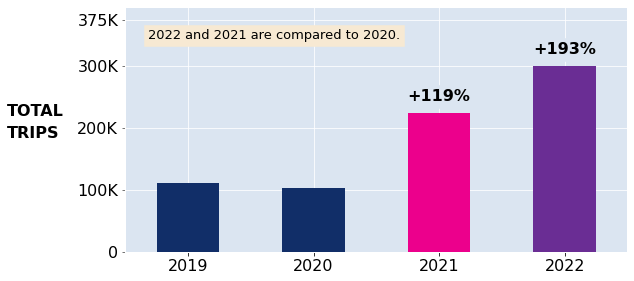

In [19]:
#clrs = ['#112e68' if (x > 120000) else '#924354' for x in trips.groupby('Year_2').size()]

ymax = 395e3
bkg_color = '#dbe5f1'
fig,ax = plt.subplots(figsize = (9,4.5))

ax = plt.axes() 
#ax.add_patch(patches.Rectangle((6.5,0),375e3,ymax,color="orange",alpha=0.25))

trips.groupby('Year').size().plot.bar(color = clrs)

ytemp = 12000

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=0)
ax.set_facecolor(bkg_color)

plt.ylabel(' ',fontsize=20,color='black',rotation=90)
plt.text(4.56,201e3+18e3,'TOTAL',ha = 'left',
         fontsize=16,color='black',weight = "bold",
         rotation=0)
plt.text(4.56,201e3-18e3,'TRIPS',ha = 'left',
         fontsize=16,color='black',weight = "bold",
         rotation=0)

plt.xlabel('')
plt.ylim(0,ymax)

plt.xticks(fontsize=16, weight = 'normal')
plt.yticks(fontsize=16, color = 'black')

#plt.yticks([0,100000,175000,250000])
y = np.array([0,100000,200000,300000,375e3])
my_yticks = ['0','100K','200K','300K','375K']
plt.yticks(y, my_yticks)

plt.xlim(5.5,9.50)

prct_change_2021_cmpto2020 = ((trip_count_2021 - trip_count_2020)/trip_count_2020)*100
prct_change_2022_cmpto2020 = ((trip_count_2022 - trip_count_2020)/trip_count_2020)*100

plt.text(5.68,350e3,'2022 and 2021 are compared to 2020.',ha = 'left',va = 'center',fontsize=13,color='black',rotation=0, 
         backgroundcolor ='#f7e9d3')
#plt.text(7,trip_count_2020+16e3,"*",
#         ha = 'center',fontsize=13,color='black',weight = "bold",rotation=0, backgroundcolor =bkg_color)
plt.text(8,trip_count_2021+20e3,
         "+"+('{:.0f}'.format(prct_change_2021_cmpto2020))+"%",
         ha = 'center',fontsize=16, weight = 'bold', color='black',rotation=0, backgroundcolor =bkg_color)
plt.text(9,trip_count_2022+20e3,
         "+"+('{:.0f}'.format(prct_change_2022_cmpto2020))+"%",
         ha = 'center',fontsize=16, weight = 'bold', color='black',rotation=0, backgroundcolor =bkg_color)

#fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(1)

In [20]:
trips['Bike Type'].unique()

array([nan])

In [21]:
print("2017 :", trips_2017['Bicycle ID'].nunique())
print("2018 :", trips_2018['Bicycle ID'].nunique())
print("2019 :", trips_2019['Bicycle ID'].nunique())
print("2020 :", trips_2020['Bicycle ID'].nunique())
print("2021 :", trips_2021['Bicycle ID'].nunique())
print("2022 :", trips_2022['Bicycle ID'].nunique())

2017 : 428
2018 : 585
2019 : 548
2020 : 702
2021 : 817
2022 : 617


<ipython-input-22-14a4182fb405>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


(5.5, 9.5)

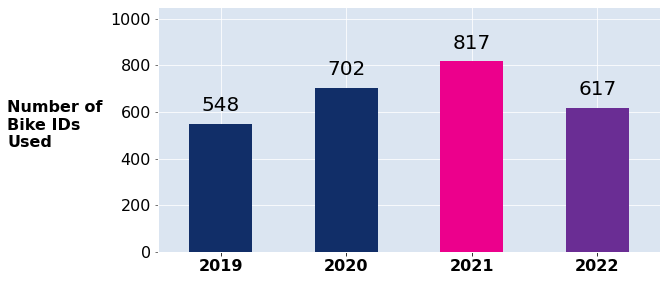

In [22]:
fig = plt.figure(figsize = (9,4.5))
trips.groupby('Year')['Bicycle ID'].nunique().plot.bar(
    color = clrs)

plt.text(6,548+55,"548",horizontalalignment='center') #2019
plt.text(7,702+55,"702",horizontalalignment='center') #2020
plt.text(8,817+55,"817",horizontalalignment='center') #2021
plt.text(9,617+55,"617",horizontalalignment='center') #2022

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=0)
ax.set_facecolor('#dbe5f1') 

plt.ylabel('                ', fontsize=22, color='black',rotation=0)
plt.text(4.30,525+75,'Number of',ha = 'left',
         fontsize=16,color='black',weight = 'bold',
         rotation=0)
plt.text(4.30,525,'Bike IDs',ha = 'left',
         fontsize=16,color='black',weight = 'bold',
         rotation=0)
plt.text(4.30,525-75,'Used',ha = 'left',
         fontsize=16,color='black',weight = 'bold',
         rotation=0)

plt.xlabel('')
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, color = 'black')
#plt.yticks([50,100])
plt.ylim(0,1050)

#fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)

plt.xlim(5.5,9.5)
#plt.xlim(xmin,xmax)

In [23]:
trips_membership = trips.groupby(['Year','Membership Type']).size().to_frame().reset_index()
trips_membership = trips_membership.loc[(trips_membership['Year'].isin([2020,2021,2022]))&
                                       (trips_membership['Membership Type'].isin(['Annual','Single Ride','Student']))].reset_index()
trips_membership.sort_values(['Membership Type','Year'])

index  Year Membership Type       0
0     47  2020          Annual   36547
3     54  2021          Annual   51581
6     61  2022          Annual   32794
1     51  2020     Single Ride   20590
4     58  2021     Single Ride   30098
7     65  2022     Single Ride   24704
2     52  2020         Student    4669
5     59  2021         Student   59080
8     66  2022         Student  149393

In [24]:
trips.loc[trips['Membership Type']=='Student'].groupby('Year').size()

Year
2014      2932
2015       343
2018    238869
2019     37445
2020      4669
2021     59080
2022    149393
dtype: int64

In [25]:
color_Student='#fec701'
color_Annual='#a24c90'
color_Monthly='#a7d194'
color_Day='#52a542'
color_SingleRide='#0584b4'
color_Weekend='#79e4fe'
color_Other='#bbbbbc'
color_Weekly = '#1d4baf'

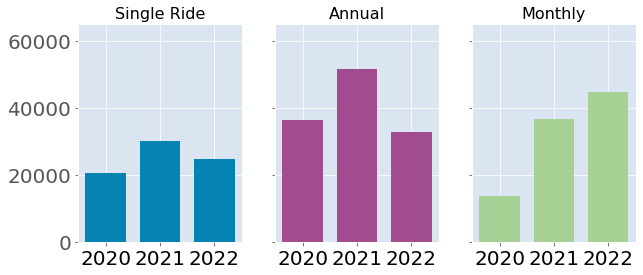

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 4))

x = [1,2,3];
my_xticks = ['2020','2021','2022'];                   

ax1.bar([1,2,3],
       trips.loc[(trips['Membership Type']=='Single Ride')&(trips['Year'].isin([2020,2021,2022]))].groupby('Year').size(),
       width=0.75, label='Single Ride', 
                color = color_SingleRide);
ax1.set_title('Single Ride',fontsize=16)
ax1.set_xticks(x);
ax1.set_xticklabels(my_xticks, rotation = 0,fontsize=20,color='black');
ax1.set_ylim(0, 65e3)

ax2.bar([1,2,3],
       trips.loc[(trips['Membership Type']=='Annual')&(trips['Year'].isin([2020,2021,2022]))].groupby('Year').size(),
       width=0.75, label='Annual', 
                color = color_Annual);
ax2.set_title('Annual',fontsize=16)
ax2.set_xticks(x);
ax2.set_xticklabels(my_xticks, rotation = 0,fontsize=20,color='black');
ax2.set_ylim(0, 65e3)
ax2.set_yticklabels([])


ax3.bar([1,2,3],
       trips.loc[(trips['Membership Type']=='Monthly')&(trips['Year'].isin([2020,2021,2022]))].groupby('Year').size(),
       width=0.75, label='Monthly', 
                color = color_Monthly);
ax3.set_title('Monthly',fontsize=16)
ax3.set_xticks(x);
ax3.set_xticklabels(my_xticks, rotation = 0,fontsize=20,color='black');
ax3.set_ylim(0, 65e3)
ax3.set_yticklabels([])

ax1.set_facecolor('#dbe5f1')
ax2.set_facecolor('#dbe5f1')
ax3.set_facecolor('#dbe5f1')

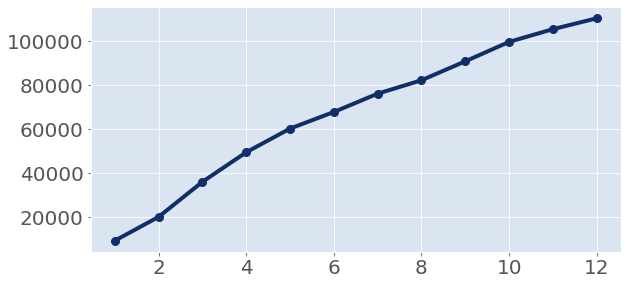

In [27]:
fig = plt.figure(figsize = (9.5,4.5))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2019.groupby('Month').size().cumsum(), 
         color = color_navy, marker='o', linestyle='solid',linewidth=4, markersize=8, 
         label = '2019')

In [28]:
trips_months = trips.groupby(['Year','Month']).size().to_frame().reset_index()

trips_months = trips_months.loc[trips_months['Year'].isin([2019,2020,2021,2022])].reset_index()
trips_months.head(24)

index  Year  Month      0
0      59  2019      1   9340
1      60  2019      2  10807
2      61  2019      3  15938
3      62  2019      4  13426
4      63  2019      5  10775
5      64  2019      6   7535
6      65  2019      7   8324
7      66  2019      8   6098
8      67  2019      9   8599
9      68  2019     10   8835
10     69  2019     11   5773
11     70  2019     12   4944
12     71  2020      1   4715
13     72  2020      2   6054
14     73  2020      3   7048
15     74  2020      4   5041
16     75  2020      5   9585
17     76  2020      6   9887
18     77  2020      7   8550
19     78  2020      8   9843
20     79  2020      9  11304
21     80  2020     10  11756
22     81  2020     11  10769
23     82  2020     12   7740

In [29]:
a = pd.concat([trips_2019.groupby('Month').size().cumsum(),
              trips_2020.groupby('Month').size().cumsum(),
              trips_2021.groupby('Month').size().cumsum(),
              trips_2022.groupby('Month').size().cumsum()],
              axis=0).reset_index()

In [30]:
trips_months['Cumulative Total By Month'] = a[0]

In [31]:
trips_months

index  Year  Month      0  Cumulative Total By Month
0      59  2019      1   9340                       9340
1      60  2019      2  10807                      20147
2      61  2019      3  15938                      36085
3      62  2019      4  13426                      49511
4      63  2019      5  10775                      60286
5      64  2019      6   7535                      67821
6      65  2019      7   8324                      76145
7      66  2019      8   6098                      82243
8      67  2019      9   8599                      90842
9      68  2019     10   8835                      99677
10     69  2019     11   5773                     105450
11     70  2019     12   4944                     110394
12     71  2020      1   4715                       4715
13     72  2020      2   6054                      10769
14     73  2020      3   7048                      17817
15     74  2020      4   5041                      22858
16     75  2020      5   9585                      32443
17     76  2020      6   9887                      42330
18     77  2020      7   8550                      50880
19     78  2020      8   9843                      60723
20     79  2020      9  11304                      72027
21     80  2020     10  11756                      83783
22     81  2020     11  10769                      94552
23     82  2020     12   7740                     102292
24     83  2021      1  10586                      10586
25     84  2021      2   7394                      17980
26     85  2021      3  16804                      34784
27     86  2021      4  16980                      51764
28     87  2021      5  17427                      69191
29     88  2021      6  15739                      84930
30     89  2021      7  15769                     100699
31     90  2021      8  16913                     117612
32     91  2021      9  28509                     146121
33     92  2021     10  34254                     180375
34     93  2021     11  24978                     205353
35     94  2021     12  18636                     223989
36     95  2022      1  14513                      14513
37     96  2022      2  21251                      35764
38     97  2022      3  27573                      63337
39     98  2022      4  36790                     100127
40     99  2022      5  26351                     126478
41    100  2022      6  19530                     146008
42    101  2022      7  19486                     165494
43    102  2022      8  24159                     189653
44    103  2022      9  40256                     229909
45    104  2022     10  43211                     273120
46    105  2022     11  26547                     299667

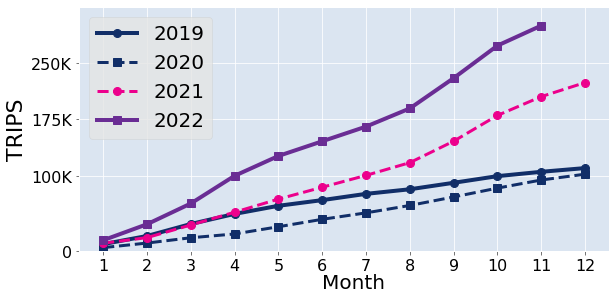

In [32]:
fig = plt.figure(figsize = (9.5,4.5))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2019.groupby('Month').size().cumsum(), 
         color = color_navy, marker='o', linestyle='solid',linewidth=4, markersize=8, 
         label = '2019')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.groupby('Month').size().cumsum(), 
         color = color_navy, marker='s', linestyle='dashed',linewidth=3, markersize=8, 
         label = '2020')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.groupby('Month').size().cumsum(), 
         color= color_light, marker='o', linestyle='dashed',linewidth=3, markersize=8, 
         label = '2021')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.groupby('Month').size().cumsum(), 
         color= color_dark, marker='s', linestyle='solid',linewidth=4, markersize=8, 
         label = '2022') #  alpha=0.75

plt.ylabel('TRIPS',fontsize=22,color='black',rotation=90)

plt.ylim(0,325000)

plt.xticks(fontsize=16, color = 'black', rotation = 0)
plt.yticks(fontsize=16, color = 'black')

y = np.array([0,100000,175000,250000])
x = list(range(1,13))
my_yticks = ['0','100K','175K','250K']
my_xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.text(6,-50000,'Month',ha = 'left',
         fontsize=20,color='black', 
         rotation=0)

plt.yticks(y, my_yticks)
plt.xticks(x)

plt.legend()


<ipython-input-33-801f606a929f>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


(4.5, 9.5)

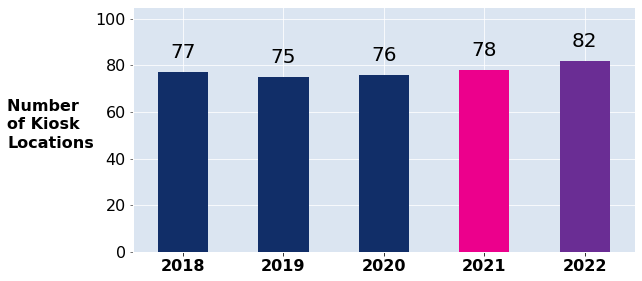

In [33]:
#clrs = ['#112e68' if (x > 120000) else '#924354' for x in trips.groupby('Year_2').size()]

fig = plt.figure(figsize = (9,4.5))
trips.groupby('Year')['Checkout Kiosk ID'].nunique().plot.bar(
    color = clrs)

plt.text(5,83,"77",horizontalalignment='center') #2018
plt.text(6,81,"75",horizontalalignment='center') #2019
plt.text(7,82,"76",horizontalalignment='center') #2020
plt.text(8,84,"78",horizontalalignment='center') #2021
plt.text(9,88,"82",horizontalalignment='center') #2022

ax = plt.axes() 
ax.tick_params(axis='x', colors='black',rotation=0)
ax.set_facecolor('#dbe5f1') 

plt.ylabel('                ', fontsize=22, color='black',rotation=0)
plt.text(3.25,52.6+8,'Number    ',ha = 'left',
         fontsize=16,color='black',weight = 'bold',
         rotation=0)
plt.text(3.25,52.6,'of Kiosk',ha = 'left',
         fontsize=16,color='black',weight = 'bold',
         rotation=0)
plt.text(3.25,52.6-8,'Locations',ha = 'left',
         fontsize=16,color='black',weight = 'bold',
         rotation=0)

plt.xlabel('')
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, color = 'black')
#plt.yticks([50,100])
plt.ylim(0,105)

#fig.patch.set_facecolor('#dbebdf')
fig.patch.set_alpha(0.7)

#plt.xlim(3.5,8.5)
plt.xlim(4.50,9.50)

In [34]:
trips.groupby('Year')['Membership Type'].nunique()

Year
2013    4
2014    8
2015    8
2016    7
2017    6
2018    7
2019    7
2020    7
2021    7
2022    7
Name: Membership Type, dtype: int64

# Checkout some Weather Data

                              name country region    wmo  icao  latitude  \
id                                                                         
72254  Camp Mabry/Austin City Asos      US     TX  72254  KATT   30.3167   

       longitude  elevation         timezone hourly_start hourly_end  \
id                                                                     
72254   -97.7667      201.0  America/Chicago   2000-01-01 2023-03-02   

      daily_start  daily_end monthly_start monthly_end     distance  
id                                                                   
72254  1938-06-01 2023-02-22    1938-01-01  2022-01-01  5952.310219  


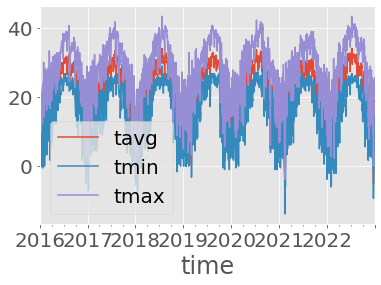

In [35]:
# https://medium.com/meteostat/meteostat-python-library-reaches-first-stable-release-d5e08567e2de
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily

# Set coordinates of Austin, TX, USA
lat = 30.2672
lon = -97.7431

# Set time period
start = datetime(2016, 1, 1)
end = datetime(2022, 12, 31)

# Get closest weather station to Vancouver, BC
stations = Stations()
stations = stations.nearby(lat, lon)
stations = stations.inventory('daily', (start, end))
station = stations.fetch(1)

print(station)

# Get daily data for 2018 at the selected weather station
data = Daily(station, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [36]:
ex = data.reset_index()
ex['years'] = pd.DatetimeIndex(ex['time']).year
ex['months'] = pd.DatetimeIndex(ex['time']).month
ex.head()

time  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun  \
0 2016-01-01   7.6   6.7   8.9   0.0   0.0  10.0  13.0   NaN  1031.8   NaN   
1 2016-01-02   6.9   5.6   8.3   5.1   0.0   NaN   3.6   NaN  1030.3   NaN   
2 2016-01-03   9.2   5.0  16.7   0.0   0.0   NaN   5.4   NaN  1026.2   NaN   
3 2016-01-04   8.1   2.8  14.4   0.0   0.0   NaN   5.8   NaN  1026.9   NaN   
4 2016-01-05   7.6   2.2  13.3   0.0   0.0   NaN   5.0   NaN     NaN   NaN   

   years  months  
0   2016       1  
1   2016       1  
2   2016       1  
3   2016       1  
4   2016       1

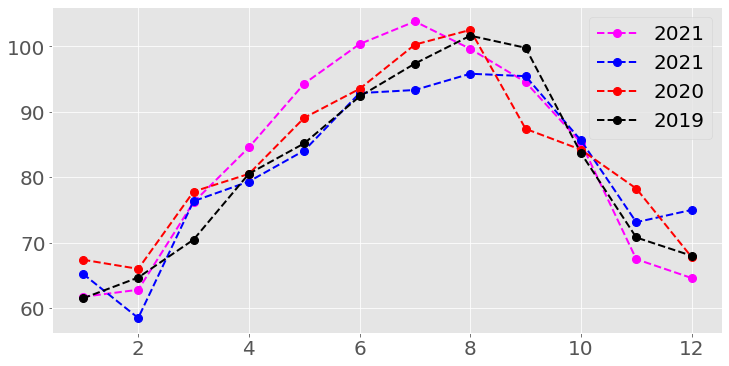

In [37]:
fig = plt.figure(figsize = (12,6))

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
        ex.loc[ex['years']== 2022].groupby('months').mean()['tmax']*(9/5)+32, 
        color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=8, 
         label = '2021')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
        ex.loc[ex['years']== 2021].groupby('months').mean()['tmax']*(9/5)+32, 
        color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=8, 
         label = '2021')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
        ex.loc[ex['years']== 2020].groupby('months').mean()['tmax']*(9/5)+32, 
        color='red', marker='o', linestyle='dashed',linewidth=2, markersize=8, 
         label = '2020')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
        ex.loc[ex['years']== 2019].groupby('months').mean()['tmax']*(9/5)+32, 
        color='black', marker='o', linestyle='dashed',linewidth=2, markersize=8, 
         label = '2019')

plt.legend()


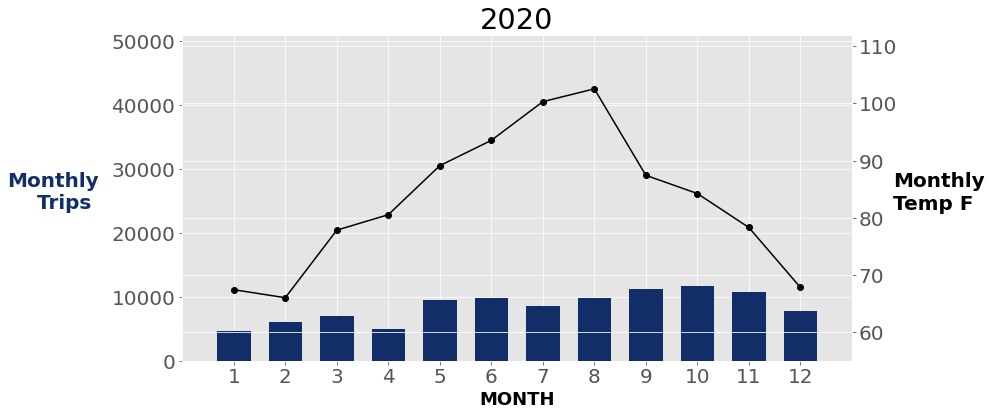

In [38]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (12,6))

# make a plot
ax.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        trips_2020.groupby('Month').size(),
       width=0.65, label='2021', 
                color = color_navy)

# set x-axis label
ax.set_xlabel("MONTH", fontsize = 18, color = 'black',weight='bold')
# set y-axis label
ax.set_ylabel(" ",
              color="green",
              fontsize=14)
ax.set_ylim(0,51e3)

plt.text(-1.62,25500+1700,'Monthly',ha = 'right',
         fontsize=20,color=color_navy,weight = 'bold',
         rotation=0)
plt.text(-1.62,25500-1700,'Trips ',ha = 'right',
         fontsize=20,color=color_navy,weight = 'bold',
         rotation=0)

# twin object for two different y-axis on the sample plot

ax2=ax.twinx()
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12], 
         ex.loc[ex['years']== 2020].groupby('months').mean()['tmax']*(9/5)+32,
         color="black",marker="o")
ax2.set_ylabel(" ",color="black",fontsize=16)

ax2.text(13.80,83.5+2,'Monthly',ha = 'left',
         fontsize=20,color='black',weight = 'bold',
         rotation=0)
ax2.text(13.80,83.5-2,'Temp F',ha = 'left',
         fontsize=20,color='black',weight = 'bold',
         rotation=0)
ax2.set_ylim(55,112)
plt.xlim(0, 13)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.title('2020')

plt.show()

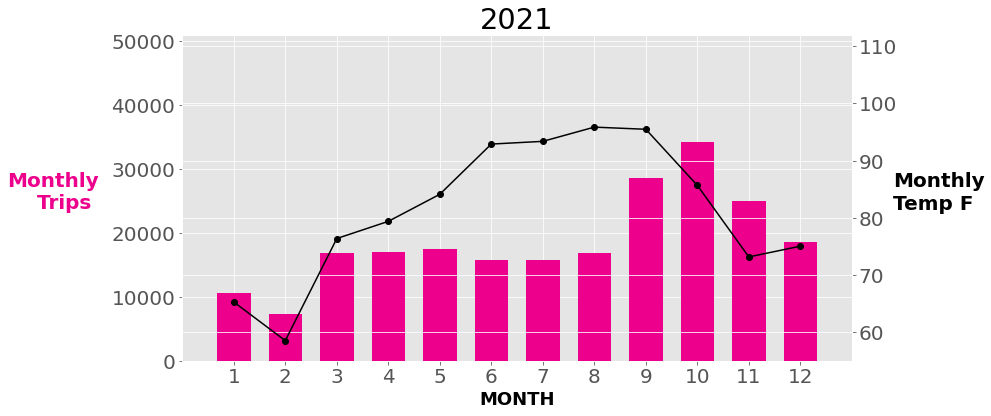

In [39]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (12,6))

# make a plot
ax.bar([1,2,3,4,5,6,7,8,9,10,11,12],
        trips_2021.groupby('Month').size(),
       width=0.65, label='2021', 
                color = color_light)

# set x-axis label
ax.set_xlabel("MONTH", fontsize = 18, color = 'black',weight='bold')
# set y-axis label
ax.set_ylabel(" ",
              color="green",
              fontsize=14)
ax.set_ylim(0,51e3)

plt.text(-1.62,25500+1700,'Monthly',ha = 'right',
         fontsize=20,color=color_light,weight = 'bold',
         rotation=0)
plt.text(-1.62,25500-1700,'Trips ',ha = 'right',
         fontsize=20,color=color_light,weight = 'bold',
         rotation=0)

# twin object for two different y-axis on the sample plot

ax2=ax.twinx()
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12], 
         ex.loc[ex['years']== 2021].groupby('months').mean()['tmax']*(9/5)+32,
         color="black",marker="o")
ax2.set_ylabel(" ",color="black",fontsize=16)

ax2.text(13.80,83.5+2,'Monthly',ha = 'left',
         fontsize=20,color='black',weight = 'bold',
         rotation=0)
ax2.text(13.80,83.5-2,'Temp F',ha = 'left',
         fontsize=20,color='black',weight = 'bold',
         rotation=0)
ax2.set_ylim(55,112)

plt.xlim(0, 13)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.title('2021')

plt.show()

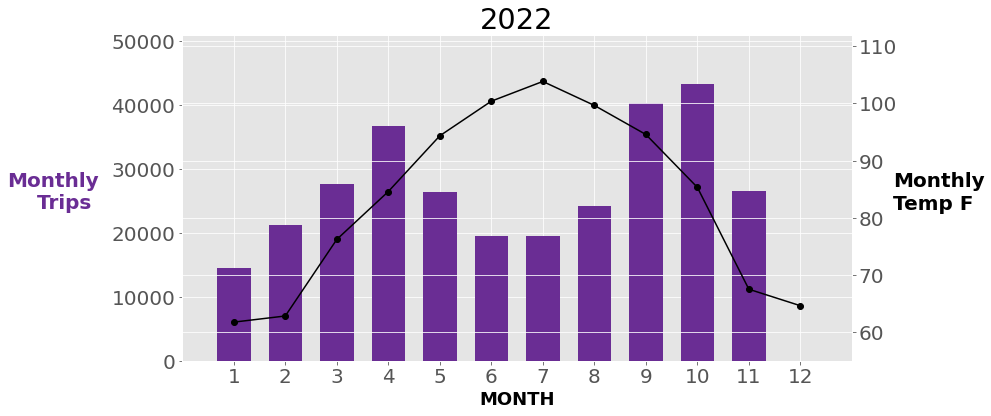

In [40]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (12,6))

# make a plot
ax.bar([1,2,3,4,5,6,7,8,9,10,11],
        trips_2022.groupby('Month').size(),
       width=0.65, label='2022', 
                color = color_dark)

# set x-axis label
ax.set_xlabel("MONTH", fontsize = 18, color = 'black',weight='bold')
# set y-axis label
ax.set_ylabel(" ",
              color="green",
              fontsize=14)
ax.set_ylim(0,51e3)

plt.text(-1.62,25500+1700,'Monthly',ha = 'right',
         fontsize=20,color=color_dark,weight = 'bold',
         rotation=0)
plt.text(-1.62,25500-1700,'Trips ',ha = 'right',
         fontsize=20,color=color_dark,weight = 'bold',
         rotation=0)

# twin object for two different y-axis on the sample plot

ax2=ax.twinx()
ax2.plot([1,2,3,4,5,6,7,8,9,10,11,12], 
         ex.loc[ex['years']== 2022].groupby('months').mean()['tmax']*(9/5)+32,
         color="black",marker="o")
ax2.set_ylabel(" ",color="black",fontsize=16)

ax2.text(13.80,83.5+2,'Monthly',ha = 'left',
         fontsize=20,color='black',weight = 'bold',
         rotation=0)
ax2.text(13.80,83.5-2,'Temp F',ha = 'left',
         fontsize=20,color='black',weight = 'bold',
         rotation=0)
ax2.set_ylim(55,112)

plt.xlim(0, 13)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.title('2022')

plt.show()

# Trips By Month

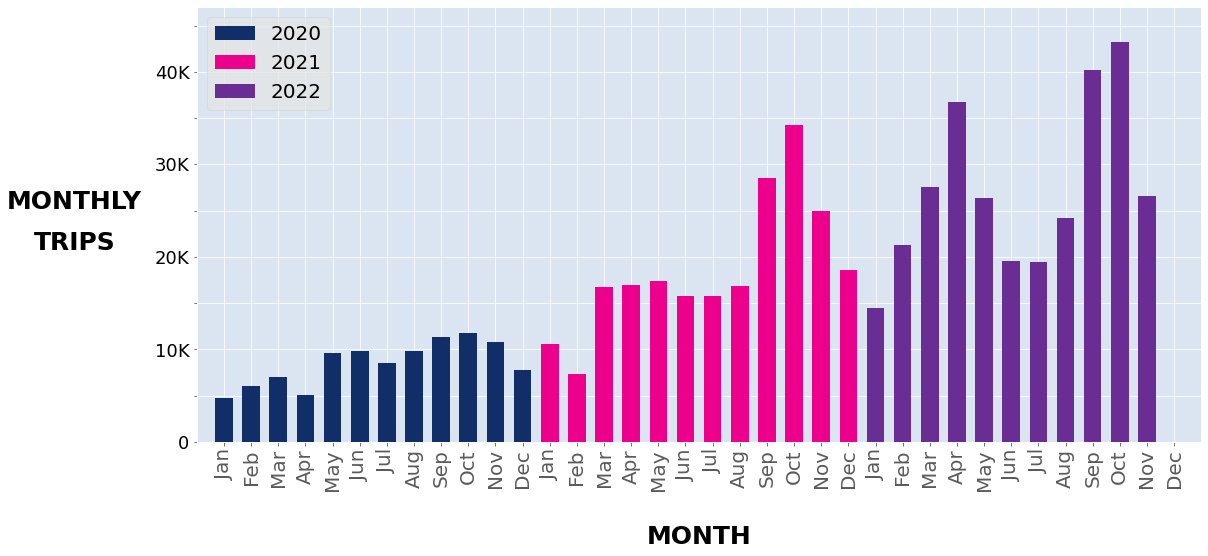

In [41]:
ymax = 47e3
ymin = 0
xmin = 0
xmax = 37

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (18,8))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

# summers
#ax.add_patch(patches.Rectangle((5.5,0),2,ymax-ymin,color="yellow",alpha=0.2))
#ax.add_patch(patches.Rectangle((5.5+12,0),2,ymax-ymin,color="yellow",alpha=0.2))
#ax.add_patch(patches.Rectangle((5.5+24,0),2,ymax-ymin,color="yellow",alpha=0.2))
# fall
#ax.add_patch(patches.Rectangle((7.5,0),5,ymax-ymin,color="orange",alpha=0.2))
#ax.add_patch(patches.Rectangle((7.5+12,0),5,ymax-ymin,color="orange",alpha=0.2))
#ax.add_patch(patches.Rectangle((7.5+24,0),5,ymax-ymin,color="orange",alpha=0.2))
# spring
#ax.add_patch(patches.Rectangle((0.5,0),5,ymax-ymin,color="blue",alpha=0.2))
#ax.add_patch(patches.Rectangle((0.5+12,0),5,ymax-ymin,color="blue",alpha=0.2))
#ax.add_patch(patches.Rectangle((0.5+24,0),5,ymax-ymin,color="blue",alpha=0.2))


# make a plot
ax.bar([1,2,3,4,5,6,7,8,9,10,11,12],
       trips_2020.groupby('Month').size(),
       width=0.65, label='2020', 
                color = color_navy)
ax.bar([13,14,15,16,17,18,19,20,21,22,23,24],
       trips_2021.groupby('Month').size(),
       width=0.65, label='2021', 
                color = color_light)
ax.bar([25,26,27,28,29,30,31,32,33,34,35],
       trips_2022.groupby('Month').size(),
       width=0.65, label='2022', 
                color = color_dark)
ax.legend(loc = 'upper left')
#ax.legend(bbox_to_anchor=(-0.06, .98))
#ax.legend(bbox_to_anchor=(0.15, 0.82),fontsize=20,facecolor="#e5e5e5")

plt.xlim(xmin, xmax)
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
my_xticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
             'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec',
            'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticks(x)
ax.set_xticklabels(my_xticks, rotation = 90,fontsize=20,color='#5A5A5A')

# set x-axis label
plt.xlabel(' ', fontsize = 20, color = 'black', weight='bold')
plt.text(((xmax-xmin)/2)+xmin,-11e3,'MONTH',ha = 'center',
         fontsize=25,color='black',weight = "bold",
         rotation=0)

plt.ylim(ymin,ymax)
y = [0, 5e3,10e3,15e3,20e3,25e3,30e3,35e3,40e3,45e3]
my_yticks = ['0',' ', '10K',' ',  '20K',' ',  '30K',' ',  '40K', ' ']
ax.set_yticks(y)
ax.set_yticklabels(my_yticks, rotation = 0,fontsize=18,color='black')
# set y-axis label
plt.ylabel(' ',fontsize=25,color='black',rotation=90,weight='bold')
plt.text(-4.5,((ymax-ymin)/2)+ymin+2.5e3,'MONTHLY',ha = 'center',va='center',
         fontsize=25,color='black',weight = "bold",
         rotation=0)
plt.text(-4.5,((ymax-ymin)/2)+ymin-2e3,'TRIPS',ha = 'center',va='center',
         fontsize=25,color='black',weight = "bold",
         rotation=0)

#plt.text(6.5,50e3,'SUMMER',ha = 'center',
#         fontsize=12,color='black',rotation=90)
#plt.text(6.5+12,50e3,'SUMMER',ha = 'center',
#         fontsize=12,color='black',rotation=90)
#plt.text(6.5+24,50e3,'SUMMER',ha = 'center',
#         fontsize=12,color='black',rotation=90)

#plt.text(10,52.5e3,'FALL',ha = 'center',fontsize=18,color='black',rotation=0)
#plt.text(10+12,52.5e3,'FALL',ha = 'center',fontsize=18,color='black',rotation=0)
#plt.text(10+24,52.5e3,'FALL',ha = 'center',fontsize=18,color='black',rotation=0)

#plt.text(15-12,52.5e3,'SPRING',ha = 'center',fontsize=18,color='black',rotation=0)
#plt.text(15,52.5e3,'SPRING',ha = 'center',fontsize=18,color='black',rotation=0)
#plt.text(15+12,52.5e3,'SPRING',ha = 'center',fontsize=18,color='black',rotation=0)
plt.show()

# Membership Types

In [42]:
((trips_2021['Membership Type'].value_counts(normalize=True,ascending=True))*100)

Other           0.007143
Weekend         5.344459
Single Ride    13.437267
Day            15.360129
Monthly        16.446343
Annual         23.028363
Student        26.376295
Name: Membership Type, dtype: float64

(0.0, 62500.0)

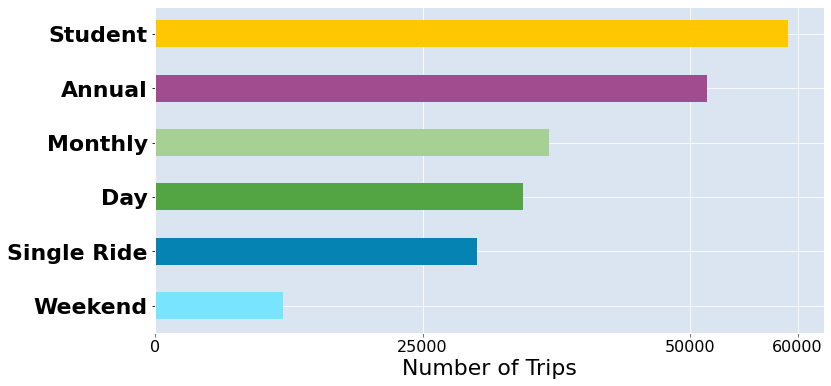

In [43]:
my_colors = [color_Weekend,color_SingleRide,color_Day,color_Monthly,color_Annual,color_Student]
fig = plt.figure(figsize = (12,6))

trips_2021.groupby(
    ['Membership Type']).size().nlargest(6).sort_values(
    ascending=True).plot.barh(color = my_colors)

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 
ax.tick_params(axis='y', colors='black')

plt.xlabel('Number of Trips',fontsize=22, color = 'black')
plt.yticks(fontsize=22, weight = 'bold')
plt.ylabel('')
plt.xticks([0,25000,50000,60000])
plt.xticks(fontsize=16, color = 'black')

plt.xlim(0,62500)
#fig.patch.set_facecolor('#dbebdf')
#fig.patch.set_alpha(0.7)

In [44]:
trips_2022.groupby(
    ['Membership Type']).size().nlargest(6).sort_values(
    ascending=False)

Membership Type
Student        149393
Monthly         44698
Annual          32794
Day             30340
Single Ride     24704
Weekend         17707
dtype: int64

(0.5, 6.5)

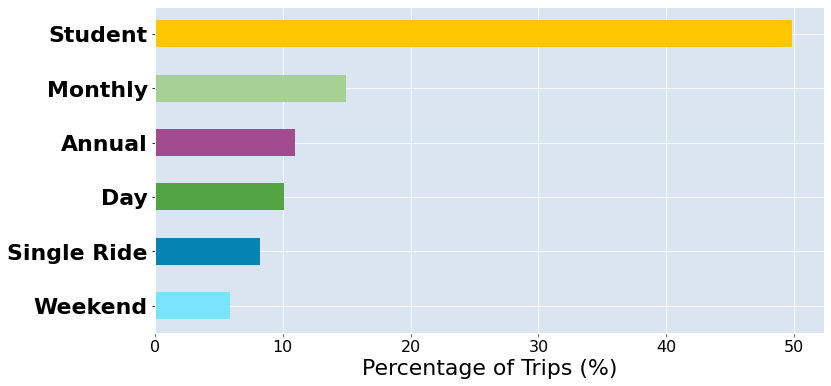

In [45]:
my_colors = [color_Other,
             color_Weekend,
             color_SingleRide,
             color_Day,
             color_Annual,
             color_Monthly,
             color_Student]
fig = plt.figure(figsize = (12,6))

((trips_2022['Membership Type'].value_counts(normalize=True,ascending=True))*100).plot.barh(color = my_colors)

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 
ax.tick_params(axis='y', colors='black')

plt.xlabel('Percentage of Trips (%)',fontsize=22, color = 'black')
plt.yticks(fontsize=22, weight = 'bold')
plt.ylabel('')
#plt.xticks([0,25000,50000,100000,150000])
plt.xticks(fontsize=16, color = 'black')

plt.ylim(0.5,6.5)
#plt.xlim(0,61500)
#fig.patch.set_facecolor('#dbebdf')
#fig.patch.set_alpha(0.7)

(array([     0,  25000,  50000, 100000, 150000]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

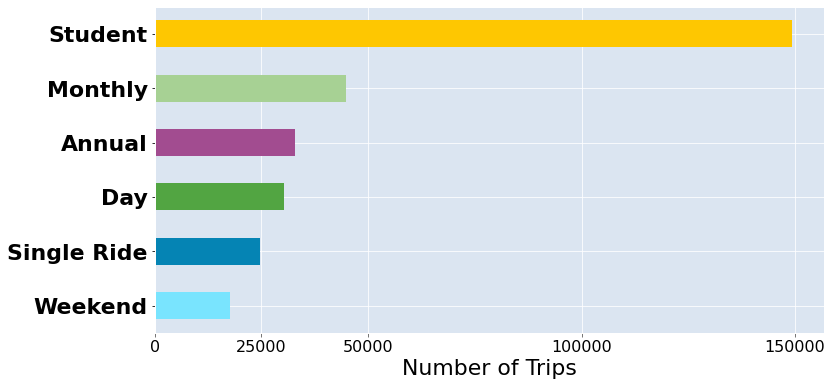

In [46]:
my_colors = [color_Weekend,color_SingleRide,color_Day,color_Annual,color_Monthly,color_Student]
fig = plt.figure(figsize = (12,6))

trips_2022.groupby(
    ['Membership Type']).size().nlargest(6).sort_values(
    ascending=True).plot.barh(color = my_colors)

ax = plt.axes() 
ax.set_facecolor('#dbe5f1') 
ax.tick_params(axis='y', colors='black')

plt.xlabel('Number of Trips',fontsize=22, color = 'black')
plt.yticks(fontsize=22, weight = 'bold')
plt.ylabel('')
plt.xticks([0,25000,50000,100000,150000])
plt.xticks(fontsize=16, color = 'black')

#plt.xlim(0,61500)
#fig.patch.set_facecolor('#dbebdf')
#fig.patch.set_alpha(0.7)

In [47]:
((trips['Membership Type'].value_counts(normalize=True,ascending=True))*100)

Weekly          0.318315
Other           0.918462
Weekend         4.757903
Monthly         8.610546
Day            12.675892
Annual         19.234128
Single Ride    26.493959
Student        26.990795
Name: Membership Type, dtype: float64

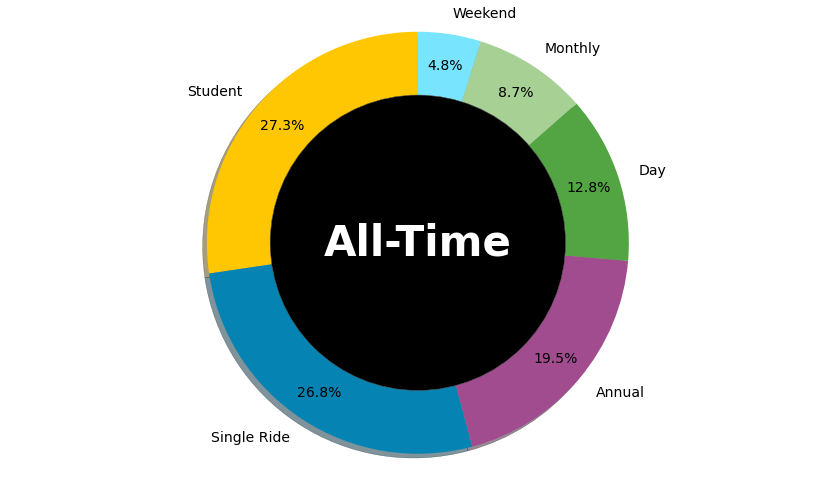

In [48]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Single Ride', 'Annual', 'Day', 'Monthly', 'Weekend'
sizes = [26.990795, 26.493959, 19.234128, 12.675892, 8.610546, 4.757903]
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [color_Student,
          color_SingleRide,
          color_Annual,
          color_Day,
          color_Monthly,
          color_Weekend]

fig1, ax = plt.subplots(figsize = (12,7))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       textprops={'fontsize': 14, 'color':'black'},
       shadow=True, startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='black',color='#5A5A5A')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax.set_title('2021\n', fontsize = 34, weight = 'bold')
ax.text(0,0,"All-Time", fontsize = 42, weight = 'bold',ha='center',va='center',color = 'white')
plt.tight_layout()

#fig1.patch.set_facecolor('#dbe5f1')
plt.show()

In [49]:
((trips_2019['Membership Type'].value_counts(normalize=True,ascending=True))*100)

Other           1.258221
Monthly         4.470352
Weekend         4.714930
Day            14.662029
Annual         18.962081
Single Ride    22.012972
Student        33.919416
Name: Membership Type, dtype: float64

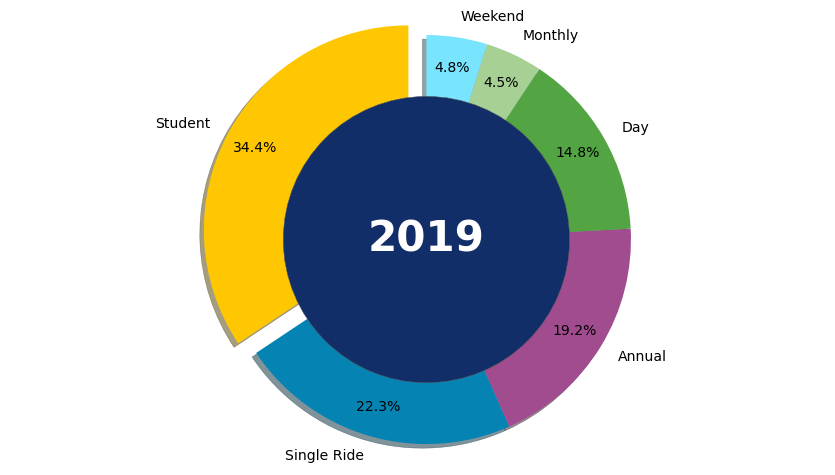

In [50]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Single Ride', 'Annual', 'Day', 'Monthly', 'Weekend'
sizes = [33.919416, 22.012972, 18.962081, 14.662029, 4.470352, 4.714930]
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [color_Student,
          color_SingleRide,
          color_Annual,
          color_Day,
          color_Monthly,
          color_Weekend]

fig1, ax = plt.subplots(figsize = (12,7))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       textprops={'fontsize': 14, 'color':'black'},
       shadow=True, startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc=color_navy,color='#5A5A5A')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax.set_title('2021\n', fontsize = 34, weight = 'bold')
ax.text(0,0,"2019", fontsize = 42, weight = 'bold',ha='center',va='center',color = 'white')
plt.tight_layout()

#fig1.patch.set_facecolor('#dbe5f1')
plt.show()

In [51]:
((trips_2020['Membership Type'].value_counts(normalize=True,ascending=True))*100)

Other           0.116334
Weekend         4.467603
Student         4.564384
Monthly        13.341219
Single Ride    20.128651
Day            21.653697
Annual         35.728112
Name: Membership Type, dtype: float64

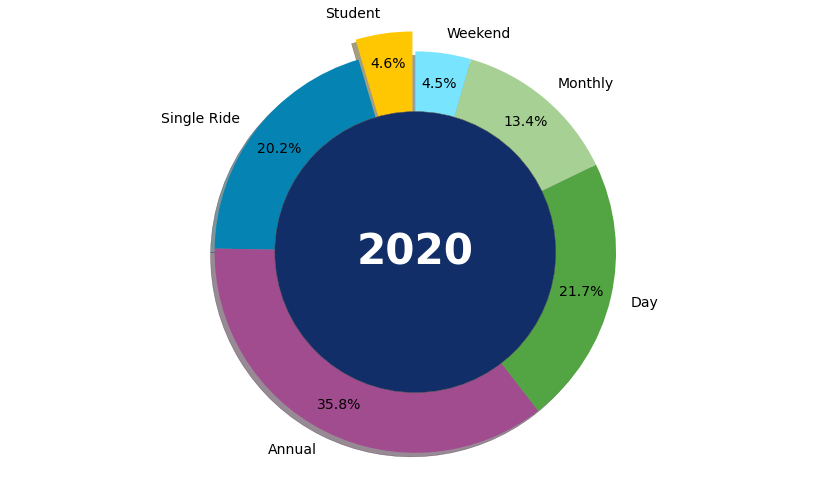

In [52]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Single Ride', 'Annual', 'Day', 'Monthly', 'Weekend'
sizes = [4.564384, 20.128651, 35.728112, 21.653697, 13.341219, 4.467603]
explode = (0.10, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [color_Student,
          color_SingleRide,
          color_Annual,
          color_Day,
          color_Monthly,
          color_Weekend]

fig1, ax = plt.subplots(figsize = (12,7))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       textprops={'fontsize': 14, 'color':'black'},
       shadow=True, startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc=color_navy,color='#5A5A5A')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax.set_title('2021\n', fontsize = 34, weight = 'bold')
ax.text(0,0,"2020", fontsize = 42, weight = 'bold',ha='center',va='center',color = 'white')
plt.tight_layout()

#fig1.patch.set_facecolor('#dbe5f1')
plt.show()

In [53]:
((trips_2021['Membership Type'].value_counts(normalize=True,ascending=True))*100)

Other           0.007143
Weekend         5.344459
Single Ride    13.437267
Day            15.360129
Monthly        16.446343
Annual         23.028363
Student        26.376295
Name: Membership Type, dtype: float64

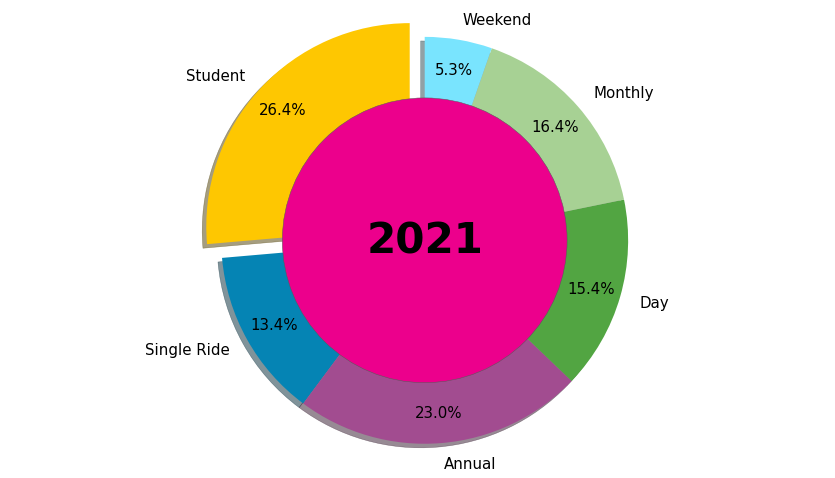

In [54]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Single Ride', 'Annual', 'Day', 'Monthly', 'Weekend'
sizes = [26.376295, 13.437267, 23.028363, 15.360129, 16.446343, 5.344459]
explode = (0.10, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [color_Student,
          color_SingleRide,
          color_Annual,
          color_Day,
          color_Monthly,
          color_Weekend]

fig1, ax = plt.subplots(figsize = (12,7))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       textprops={'fontsize': 15},
       shadow=True, startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc=color_light,color='#5A5A5A')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax.set_title('2021\n', fontsize = 34, weight = 'bold')
ax.text(0,0,"2021", fontsize = 42, weight = 'bold',ha='center',va='center')
plt.tight_layout()
plt.show()

In [55]:
((trips_2022['Membership Type'].value_counts(normalize=True,ascending=True))*100)

Other           0.010345
Weekend         5.908892
Single Ride     8.243817
Day            10.124572
Annual         10.943481
Monthly        14.915890
Student        49.853004
Name: Membership Type, dtype: float64

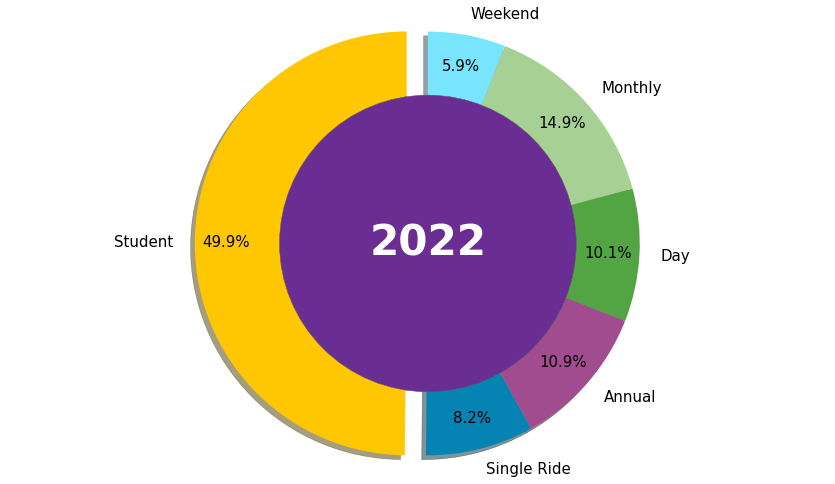

In [56]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Student', 'Single Ride', 'Annual', 'Day', 'Monthly', 'Weekend'
sizes = [49.853004, 8.243817, 10.943481, 10.124572, 14.915890, 5.908892]
explode = (0.10, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [color_Student,
          color_SingleRide,
          color_Annual,
          color_Day,
          color_Monthly,
          color_Weekend]

fig1, ax = plt.subplots(figsize = (12,7))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       textprops={'fontsize': 15},
        shadow=True, startangle=90, pctdistance=0.85)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc=color_dark, color ='#5A5A5A' )
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#ax.set_title('2021\n', fontsize = 34, weight = 'bold')
ax.text(0,0,"2022", fontsize = 42, weight = 'bold',ha='center',va='center',color='white')
plt.tight_layout()
plt.show()

In [57]:
trips_2020.loc[trips_2020['Membership Type']=='Weekend'].groupby('Month').size()

Month
3      76
4     223
5     387
6     590
7     372
8     467
9     701
10    850
11    608
12    296
dtype: int64

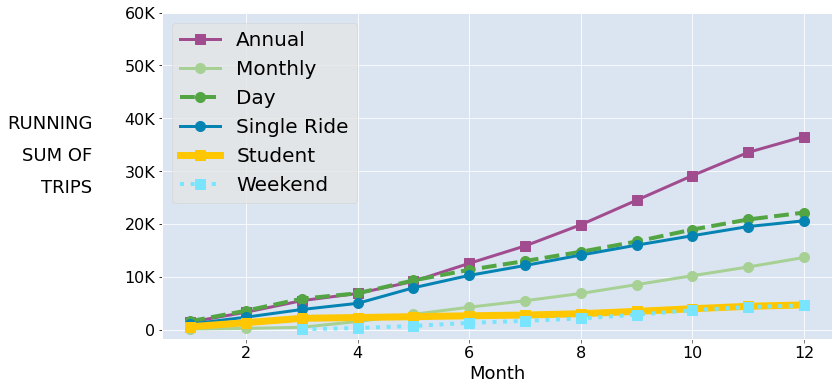

In [58]:
fig = plt.figure(figsize = (12,6))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Annual'].groupby('Month').size().cumsum(), 
         color=color_Annual, marker='s', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Annual')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Monthly'].groupby('Month').size().cumsum(), 
         color=color_Monthly, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Monthly')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Day'].groupby('Month').size().cumsum(), 
         color=color_Day, marker='o', linestyle='dashed',linewidth=4, markersize=10, 
         label = 'Day')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Single Ride'].groupby('Month').size().cumsum(), 
         color=color_SingleRide, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Single Ride')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Student'].groupby('Month').size().cumsum(), 
         color=color_Student, marker='s', linestyle='solid',linewidth=7, markersize=10, 
         label = 'Student')

plt.plot([3,4,5,6,7,8,9,10,11,12],
         trips_2020.loc[trips_2020['Membership Type']=='Weekend'].groupby('Month').size().cumsum(), 
         color=color_Weekend, marker='s', linestyle='dotted',linewidth=4, markersize=10, 
         label = 'Weekend')

ax.set_facecolor('#dbe5f1') 
plt.xlabel('Month',fontsize=18, color = 'black')
plt.xticks(fontsize=16, color = 'black')
plt.xticks([2,4,6,8,10,12])
plt.xlim(0.5,12.5)

ax.tick_params(axis='y', colors='black')
plt.yticks(fontsize=16, color = 'black')
y = np.array([0,10e3, 20e3, 30e3, 40e3, 50e3, 60e3])
my_yticks = ['0','10K','20K','30K','40K','50K','60K']
plt.yticks(y, my_yticks)

plt.ylabel(' ',fontsize=20,color='black',rotation=90)
plt.text(-0.75,38e3,'RUNNING',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
plt.text(-0.75,32e3,'SUM OF',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
plt.text(-0.75,26e3,'TRIPS',ha = 'right',
         fontsize=18,color='black',
         rotation=0)

#plt.title("2020")
plt.legend()

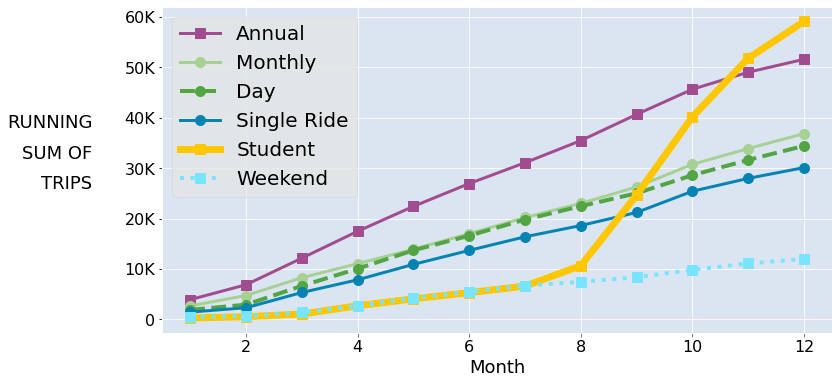

In [59]:
fig = plt.figure(figsize = (12,6))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Annual'].groupby('Month').size().cumsum(), 
         color=color_Annual, marker='s', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Annual')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Monthly'].groupby('Month').size().cumsum(), 
         color=color_Monthly, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Monthly')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Day'].groupby('Month').size().cumsum(), 
         color=color_Day, marker='o', linestyle='dashed',linewidth=4, markersize=10, 
         label = 'Day')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Single Ride'].groupby('Month').size().cumsum(), 
         color=color_SingleRide, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Single Ride')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Student'].groupby('Month').size().cumsum(), 
         color=color_Student, marker='s', linestyle='solid',linewidth=7, markersize=10, 
         label = 'Student')

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12],
         trips_2021.loc[trips_2021['Membership Type']=='Weekend'].groupby('Month').size().cumsum(), 
         color=color_Weekend, marker='s', linestyle='dotted',linewidth=4, markersize=10, 
         label = 'Weekend')

ax.set_facecolor('#dbe5f1') 
plt.xlabel('Month',fontsize=18, color = 'black')
plt.xticks(fontsize=16, color = 'black')
plt.xticks([2,4,6,8,10,12])
plt.xlim(0.5,12.5)

ax.tick_params(axis='y', colors='black')
plt.yticks(fontsize=16, color = 'black')
y = np.array([0,10e3, 20e3, 30e3, 40e3, 50e3, 60e3])
my_yticks = ['0','10K','20K','30K','40K','50K','60K']
plt.yticks(y, my_yticks)

plt.ylabel(' ',fontsize=20,color='black',rotation=90)
plt.text(-0.75,38e3,'RUNNING',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
plt.text(-0.75,32e3,'SUM OF',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
plt.text(-0.75,26e3,'TRIPS',ha = 'right',
         fontsize=18,color='black',
         rotation=0)

#plt.title("2021")
plt.legend()

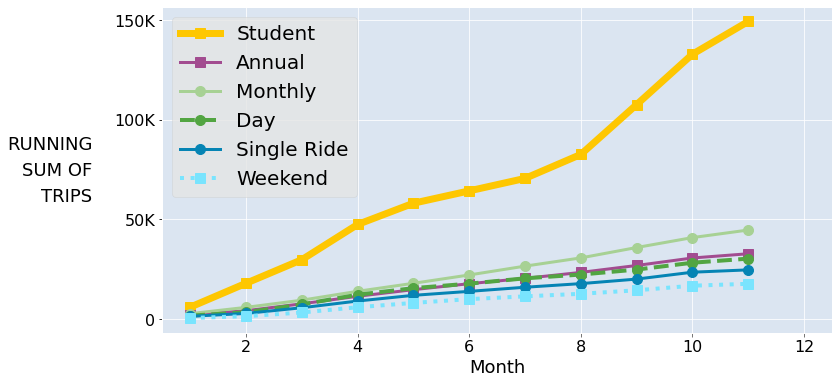

In [60]:
fig = plt.figure(figsize = (12,6))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Student'].groupby('Month').size().cumsum(), 
         color=color_Student, marker='s', linestyle='solid',linewidth=7, markersize=10, 
         label = 'Student')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Annual'].groupby('Month').size().cumsum(), 
         color=color_Annual, marker='s', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Annual')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Monthly'].groupby('Month').size().cumsum(), 
         color=color_Monthly, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Monthly')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Day'].groupby('Month').size().cumsum(), 
         color=color_Day, marker='o', linestyle='dashed',linewidth=4, markersize=10, 
         label = 'Day')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Single Ride'].groupby('Month').size().cumsum(), 
         color=color_SingleRide, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Single Ride')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Weekend'].groupby('Month').size().cumsum(), 
         color=color_Weekend, marker='s', linestyle='dotted',linewidth=4, markersize=10, 
         label = 'Weekend')

ax.set_facecolor('#dbe5f1') 
plt.xlabel('Month',fontsize=18, color = 'black')
plt.xticks(fontsize=16, color = 'black')
plt.xticks([2,4,6,8,10,12])
plt.xlim(0.5,12.5)

ax.tick_params(axis='y', colors='black')
plt.yticks(fontsize=16, color = 'black')
y = np.array([0, 50e3, 100e3, 150e3])
my_yticks = ['0','50K','100K','150K']
plt.yticks(y, my_yticks)

plt.ylabel(' ',fontsize=20,color='black',rotation=90)
plt.text(-0.75,85e3,'RUNNING',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
plt.text(-0.75,72e3,'SUM OF',ha = 'right',
         fontsize=18,color='black',
         rotation=0)
plt.text(-0.75,59e3,'TRIPS',ha = 'right',
         fontsize=18,color='black',
         rotation=0)

#plt.title("2022")
plt.legend()

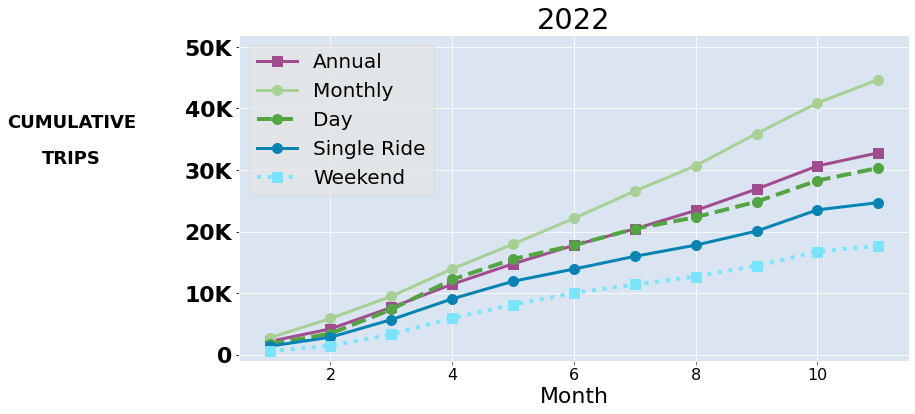

In [61]:
fig = plt.figure(figsize = (12,6))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

#plt.plot([1,2,3,4,5,6,7,8,9,10,11],
#         trips_2022.loc[trips_2022['Membership Type']=='Student'].groupby('Month').size().cumsum(), 
#         color=color_Student, marker='s', linestyle='solid',linewidth=7, markersize=10, 
#         label = 'Student')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Annual'].groupby('Month').size().cumsum(), 
         color=color_Annual, marker='s', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Annual')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Monthly'].groupby('Month').size().cumsum(), 
         color=color_Monthly, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Monthly')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Day'].groupby('Month').size().cumsum(), 
         color=color_Day, marker='o', linestyle='dashed',linewidth=4, markersize=10, 
         label = 'Day')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Single Ride'].groupby('Month').size().cumsum(), 
         color=color_SingleRide, marker='o', linestyle='solid',linewidth=3, markersize=10, 
         label = 'Single Ride')

plt.plot([1,2,3,4,5,6,7,8,9,10,11],
         trips_2022.loc[trips_2022['Membership Type']=='Weekend'].groupby('Month').size().cumsum(), 
         color=color_Weekend, marker='s', linestyle='dotted',linewidth=4, markersize=10, 
         label = 'Weekend')

ax.set_facecolor('#dbe5f1') 
plt.xlabel('Month',fontsize=22, color = 'black')
plt.xticks(fontsize=16, color = 'black')
ax.tick_params(axis='y', colors='black')
plt.yticks(fontsize=22, weight = 'bold')
y = np.array([0,10e3, 20e3, 30e3, 40e3, 50e3])
my_yticks = ['0','10K','20K','30K','40K','50K']
plt.yticks(y, my_yticks)
plt.ylim(-1000,52e3)

plt.ylabel(' ',fontsize=20,color='black',rotation=90)
plt.text(-2.25,37e3,'CUMULATIVE',ha = 'center',
         fontsize=18,color='black',weight = "bold",
         rotation=0)
plt.text(-2.25,31e3,'TRIPS',ha = 'center',
         fontsize=18,color='black',weight = "bold",
         rotation=0)

plt.title("2022")
plt.legend()

# GeoMaps STuff

In [62]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [63]:
# Neighborhoods Shape File
base_map_neighborhoods = gpd.read_file(
    '../data/data_austintexas_gov/Neighborhoods/geo_export_dc98148d-fe86-40df-83c0-be01050282f9.shp')

In [64]:
# Street Centerline Shape File
base_map_roads = gpd.read_file(
    '../data/data_austintexas_gov/TxDOT_Roadways/TxDOT_Roadways.shp')

In [65]:
base_map_neighborhoods.head()

fid  target_fid        neighname   sqmiles     shape_leng    shape_area  \
0   3.0         3.0    ANDERSON MILL  8.669086  154458.205390  2.416802e+08   
1  95.0        95.0     WINDSOR PARK  2.383074   40527.378654  6.643628e+07   
2  19.0        19.0           DAWSON  0.495535   17697.924998  1.381473e+07   
3  91.0        91.0  WEST UNIVERSITY  0.738442   24981.044476  2.058658e+07   
4  49.0        49.0              MLK  1.545283   33470.415430  4.308001e+07   

      shape_le_2                                           geometry  
0  154458.205390  POLYGON ((-97.79231 30.45671, -97.79154 30.452...  
1   40527.378654  POLYGON ((-97.67076 30.30854, -97.67204 30.308...  
2   17697.924998  POLYGON ((-97.75353 30.23876, -97.75472 30.237...  
3   24981.044476  POLYGON ((-97.73815 30.30275, -97.73860 30.301...  
4   33470.415430  POLYGON ((-97.68262 30.28587, -97.68372 30.284...

In [66]:
base_map_roads.head()

OBJECTID   GID  BEGIN_DFO  END_DFO      RTE_NM  RTE_GRID RTE_PRFX RTE_NBR  \
0         1  2242      1.057    1.775  BU0081E-KG    160078       BU      81   
1         2    76     12.288   12.679   FM2818-XG    174728       FM    2818   
2         3  2398      0.000   40.167   FM0054-KG    175638       FM      54   
3         4   379    601.926  603.720   IH0020-AG    153706       IH      20   
4         5  1408      0.000    2.253   SL0151-AG    154345       SL     151   

  RTE_SFX       RDBD_TYPE    DES_DRCT COUNTY       RDWAY_STAT  FUNC_SYS  \
0       E  Single Roadbed  Southbound   None  Open to Traffic         5   
1    None   Left Frontage  Southbound   None  Open to Traffic         5   
2    None  Single Roadbed   Eastbound   None  Open to Traffic         5   
3    None  Right Frontage   Eastbound   None  Open to Traffic         5   
4    None  Right Frontage   Eastbound   None  Open to Traffic         5   

  MAP_LBL  ZOOM                        SEARCH  SHAPE_Leng  \
0     81E     6    BU0081E-KG (1.057 - 1.775)    0.010533   
1    2818    10   FM2818-XG (12.288 - 12.679)    0.006575   
2      54     5        FM0054-KG (0 - 40.167)    0.689358   
3      20     9  IH0020-AG (601.926 - 603.72)    0.030453   
4     151    10         SL0151-AG (0 - 2.253)    0.037536   

                                            geometry  
0  LINESTRING (-97.47271 33.05567, -97.47267 33.0...  
1  LINESTRING (-96.33575 30.58690, -96.33542 30.5...  
2  LINESTRING (-103.04639 33.87947, -103.04542 33...  
3  LINESTRING (-94.59187 32.47016, -94.59170 32.4...  
4  LINESTRING (-94.09869 33.39523, -94.09871 33.3...

In [67]:
base_map_roads_test = base_map_roads.loc[(base_map_roads['RTE_PRFX'].isin(['IH','SL']))&(base_map_roads['RDBD_TYPE'].str.contains('Roadbed'))]

In [68]:
base_map_roads_test.shape[0]

560

In [69]:
base_map_roads.loc[base_map_roads['RTE_NM'].str.contains('lamar')]

Empty GeoDataFrame
Columns: [OBJECTID, GID, BEGIN_DFO, END_DFO, RTE_NM, RTE_GRID, RTE_PRFX, RTE_NBR, RTE_SFX, RDBD_TYPE, DES_DRCT, COUNTY, RDWAY_STAT, FUNC_SYS, MAP_LBL, ZOOM, SEARCH, SHAPE_Leng, geometry]
Index: []

In [70]:
base_map_roads_test.loc[(base_map_roads_test['RTE_PRFX']=='IH') & (base_map_roads_test['RTE_NBR']=='35')]['RDBD_TYPE'].unique()

array(['Single Roadbed', 'Left Roadbed', 'Right Roadbed'], dtype=object)

In [71]:
loc_full = kiosk['Location']
loc_full
loc_split = loc_full.str.split(',', n=- 1, expand=True)
lat_0 = loc_split[0]
lon_0 = loc_split[1]

# print(lat_0[1][1:-1])

lat = lat_0.str.replace('(', '')
lon = lon_0.str.replace(')', '')

kiosk["Latitude"] = lat.astype('float')
kiosk["Longitude"] = lon.astype('float')

In [72]:
geometry = [Point(xy) for xy in zip( kiosk["Longitude"], kiosk["Latitude"])]
geometry[:3]

In [73]:
crs = "EPSG:4326"

# create geo-DataFrame
kiosk_geo = gpd.GeoDataFrame(kiosk,crs = crs,
                         geometry = geometry)

# Location of Kiosks

In [74]:
kiosk_geo.head()

Unnamed: 0  Unnamed: 0.1  Kiosk ID                            Kiosk Name  \
0           0             0      2823  East 5th/Broadway @ Capital Metro HQ   
1           1             1      3291                      11th/San Jacinto   
2           2             2      3292                       East 4th/Chicon   
3           3             3      3293                   East 2nd/Pedernales   
4           4             4      3294                            6th/Lavaca   

  Kiosk Status                 Location            Address Alternate Name  \
0       active     (30.2563, -97.71007)      2910 E 5th St            NaN   
1       active    (30.27193, -97.73854)    310 E. 11th St.            NaN   
2       active    (30.25987, -97.72373)  1819 East 4th St.            NaN   
3       active    (30.25542, -97.71665)      2414 E 2nd St            NaN   
4       active  (30.268887, -97.745242)     601 Lavaca St.            NaN   

   City Asset Number         Property Type  Number of Docks Power Type  \
0            16684.0  undetermined_parking             13.0      solar   
1            32503.0              sidewalk             11.0      solar   
2            32516.0  undetermined_parking              9.0      solar   
3            16729.0    nonmetered_parking             10.0      solar   
4            32515.0              sidewalk             12.0      solar   

   Footprint Length  Footprint Width  \
0              40.0              5.0   
1              35.0              5.0   
2              30.0              5.0   
3              20.0             15.0   
4              25.0              8.0   

                                               Notes  Council District  Image  \
0                                                NaN                 3    NaN   
1                                                NaN                 1    NaN   
2                                                NaN                 3    NaN   
3  Kiosk replaced by Barton Sp/Riverside.  Old ci...                 3    NaN   
4                            double sided, remeasure                 9    NaN   

            Modified Date   Latitude  Longitude                    geometry  \
0  01/04/2021 12:00:00 AM  30.256300 -97.710070  POINT (-97.71007 30.25630)   
1  01/04/2021 12:00:00 AM  30.271930 -97.738540  POINT (-97.73854 30.27193)   
2  01/04/2021 12:00:00 AM  30.259870 -97.723730  POINT (-97.72373 30.25987)   
3  01/04/2021 12:00:00 AM  30.255420 -97.716650  POINT (-97.71665 30.25542)   
4  03/04/2022 10:21:00 AM  30.268887 -97.745242  POINT (-97.74524 30.26889)   

        Neighborhood Neighborhood Group        Lat        Lon  
0            GOVALLE        EAST AUSTIN  30.256300 -97.710070  
1           DOWNTOWN           DOWNTOWN  30.271930 -97.738540  
2  EAST CESAR CHAVEZ        EAST AUSTIN  30.259870 -97.723730  
3              HOLLY        EAST AUSTIN  30.255420 -97.716650  
4           DOWNTOWN           DOWNTOWN  30.268887 -97.745242

In [75]:
print('Lat: ', kiosk_geo['Latitude'].min(),kiosk_geo['Latitude'].max())
print('Lon: ', kiosk_geo['Longitude'].min(),kiosk_geo['Longitude'].max())

Lat:  30.24258 30.29439
Lon:  -97.78375 -97.69807


In [76]:
# x and y limits, x and y ticks
xlen = kiosk_geo['Longitude'].max()-kiosk_geo['Longitude'].min()
xdelta = 0.05*xlen
xlo = kiosk_geo['Longitude'].min()-xdelta
xhi = kiosk_geo['Longitude'].max()+xdelta
xmid = (xlen/2)+xlo

ylen = kiosk_geo['Latitude'].max()-kiosk_geo['Latitude'].min()
ydelta = 0.05*ylen
ylo = kiosk_geo['Latitude'].min()-ydelta
yhi = kiosk_geo['Latitude'].max()+ydelta
ymid = (ylen/2)+ylo

print("ylo: ", ylo)
print("yhi: ", yhi)
print('\n')
print("xlo: ", xlo)
print("xhi: ", xhi)

ylo:  30.2399895
yhi:  30.2969805


xlo:  -97.788034
xhi:  -97.693786


# MAP All-Time By Membership Types

In [77]:
yr_txt = '2022'

In [78]:
#trips.loc[trips['Checkout Kiosk ID'] == 2823].groupby('Membership Type').size()

In [79]:
trips_temp = trips_2022
trips_Student = trips_temp.loc[trips_temp['Membership Type']=='Student']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Student.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Student Rides'}, 
                             inplace = True)
trips_Annual = trips_temp.loc[trips_temp['Membership Type']=='Annual']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Annual.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Annual Rides'}, 
                             inplace = True)
trips_Monthly = trips_temp.loc[trips_temp['Membership Type']=='Monthly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Monthly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Monthly Rides'}, 
                             inplace = True)
trips_Day = trips_temp.loc[trips_temp['Membership Type']=='Day']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Day.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Day Rides'}, 
                             inplace = True)
trips_SingleRide = trips_temp.loc[trips_temp['Membership Type']=='Single Ride']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_SingleRide.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Single Rides'}, 
                             inplace = True)
trips_Weekend = trips_temp.loc[trips_temp['Membership Type']=='Weekend']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekend.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekend Rides'}, 
                             inplace = True)
trips_Other = trips_temp.loc[trips_temp['Membership Type']=='Other']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Other.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Other Rides'}, 
                             inplace = True)

trips_Weekly = trips_temp.loc[trips_temp['Membership Type']=='Weekly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekly Rides'}, 
                             inplace = True)

trips_all = trips_temp['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_all.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'All Rides'}, 
                             inplace = True)

test_kiosks = kiosk_geo['Kiosk ID'].to_frame()
result0 = test_kiosks.merge(trips_Student, how = "left", on=["Kiosk ID","Kiosk ID"])
result1 = result0.merge(trips_SingleRide, how = "left", on=["Kiosk ID","Kiosk ID"])
result2 = result1.merge(trips_Annual, how = "left", on=["Kiosk ID","Kiosk ID"])
result3 = result2.merge(trips_Day, how = "left", on=["Kiosk ID","Kiosk ID"])
result4 = result3.merge(trips_Monthly, how = "left", on=["Kiosk ID","Kiosk ID"])
result5 = result4.merge(trips_Weekend, how = "left", on=["Kiosk ID","Kiosk ID"])
result6 = result5.merge(trips_Other, how = "left", on=["Kiosk ID","Kiosk ID"])
result7 = result6.merge(trips_Weekly, how = "left", on=["Kiosk ID","Kiosk ID"])
result = result7.merge(trips_all, how = "left", on=["Kiosk ID","Kiosk ID"])

result.head(10)

Kiosk ID  Student Rides  Single Rides  Annual Rides  Day Rides  \
0      2823           19.0         110.0         489.0      117.0   
1      3291           48.0          89.0         243.0      154.0   
2      3292           40.0         154.0         538.0      193.0   
3      3293           28.0         133.0         112.0      215.0   
4      3294          199.0          95.0         229.0      127.0   
5      3377          369.0         609.0         417.0      815.0   
6      3513          110.0         474.0         511.0      744.0   
7      3660          313.0         315.0        1358.0      329.0   
8      3684          179.0         570.0         271.0      766.0   
9      3685          315.0         163.0         401.0      191.0   

   Monthly Rides  Weekend Rides  Other Rides  Weekly Rides  All Rides  
0          281.0          102.0          NaN           NaN     1118.0  
1          158.0          141.0          NaN           NaN      833.0  
2          328.0          148.0          NaN           NaN     1401.0  
3          165.0          280.0          NaN           NaN      933.0  
4          212.0          105.0          NaN           NaN      967.0  
5          305.0          242.0          NaN           NaN     2757.0  
6          525.0          513.0          NaN           NaN     2877.0  
7          716.0          370.0          NaN           NaN     3401.0  
8          326.0          510.0          NaN           NaN     2622.0  
9          612.0          142.0          NaN           NaN     1824.0

In [80]:
result_last = result[['Kiosk ID']].copy()
result_last['Student Prct'] = result["Student Rides"].div(result["All Rides"], axis=0)*100
result_last['Single Prct'] = result["Single Rides"].div(result["All Rides"], axis=0)*100
result_last['Annual Prct'] = result["Annual Rides"].div(result["All Rides"], axis=0)*100
result_last['Day Prct'] = result["Day Rides"].div(result["All Rides"], axis=0)*100
result_last['Monthly Prct'] = result["Monthly Rides"].div(result["All Rides"], axis=0)*100
result_last['Weekend Prct'] = result["Weekend Rides"].div(result["All Rides"], axis=0)*100
result_last['Other Prct'] = result["Other Rides"].div(result["All Rides"], axis=0)*100
result_last['Weekly Prct'] = result["Weekly Rides"].div(result["All Rides"], axis=0)*100

In [81]:
result.sum()

Kiosk ID         341837.0
Student Rides    149391.0
Single Rides      24695.0
Annual Rides      32788.0
Day Rides         30335.0
Monthly Rides     44693.0
Weekend Rides     17702.0
Other Rides          31.0
Weekly Rides          0.0
All Rides        299635.0
dtype: float64

In [82]:
trips_temp.groupby('Checkout Kiosk ID').size(
        ).nlargest(5)

Checkout Kiosk ID
3798.0    33588
2498.0    17758
3838.0    15202
3795.0    13320
2547.0    12034
dtype: int64

In [83]:
kiosk.loc[kiosk['Kiosk ID']==3791]

Unnamed: 0  Unnamed: 0.1  Kiosk ID           Kiosk Name Kiosk Status  \
64          64            64      3791  Lake Austin/Enfield       active   

                 Location                Address Alternate Name  \
64  (30.29439, -97.78375)  3825 Lake Austin Blvd            NaN   

    City Asset Number         Property Type  Number of Docks Power Type  \
64            32672.0  undetermined_parking             13.0      solar   

    Footprint Length  Footprint Width Notes  Council District  Image  \
64              40.0              5.0   NaN                10    NaN   

             Modified Date  Latitude  Longitude                    geometry  \
64  01/04/2021 12:00:00 AM  30.29439  -97.78375  POINT (-97.78375 30.29439)   

      Neighborhood Neighborhood Group       Lat       Lon  
64  WEST AUSTIN NG        WEST AUSTIN  30.29439 -97.78375

In [84]:
kiosk_id=3791
trow = result_last.loc[result_last['Kiosk ID']==kiosk_id].reset_index(drop=True).T.reset_index()
trow_min = trow[1:8]
trow_min.rename(columns = {'index':'Info',
                      0:'Trips'}, inplace = True)
temp = trow_min.loc[trow_min['Trips'].notnull()].reset_index()

temp


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


index          Info      Trips
0      1  Student Prct  25.986079
1      2   Single Prct  17.749420
2      3   Annual Prct  11.020882
3      4      Day Prct  22.041763
4      5  Monthly Prct  11.716937
5      6  Weekend Prct  11.484919

In [85]:
kiosk_id=3791
trow = result_last.loc[result_last['Kiosk ID']==kiosk_id].reset_index(drop=True).T.reset_index()
trow_min = trow[1:8]
trow_min.rename(columns = {'index':'Info',
                      0:'Trips'}, inplace = True)
temp = trow_min.loc[trow_min['Trips'].notnull()].sort_values(by = ["Trips"], ascending=False).reset_index(drop=True)
temp

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Info      Trips
0  Student Prct  25.986079
1      Day Prct  22.041763
2   Single Prct  17.749420
3  Monthly Prct  11.716937
4  Weekend Prct  11.484919
5   Annual Prct  11.020882

In [86]:
kiosk_geo.loc[kiosk_geo['Kiosk ID'] == 2574]['Latitude'].reset_index().iat[0, 1]

30.2659

In [87]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [88]:
kiosk_geo.head()

Unnamed: 0  Unnamed: 0.1  Kiosk ID                            Kiosk Name  \
0           0             0      2823  East 5th/Broadway @ Capital Metro HQ   
1           1             1      3291                      11th/San Jacinto   
2           2             2      3292                       East 4th/Chicon   
3           3             3      3293                   East 2nd/Pedernales   
4           4             4      3294                            6th/Lavaca   

  Kiosk Status                 Location            Address Alternate Name  \
0       active     (30.2563, -97.71007)      2910 E 5th St            NaN   
1       active    (30.27193, -97.73854)    310 E. 11th St.            NaN   
2       active    (30.25987, -97.72373)  1819 East 4th St.            NaN   
3       active    (30.25542, -97.71665)      2414 E 2nd St            NaN   
4       active  (30.268887, -97.745242)     601 Lavaca St.            NaN   

   City Asset Number         Property Type  Number of Docks Power Type  \
0            16684.0  undetermined_parking             13.0      solar   
1            32503.0              sidewalk             11.0      solar   
2            32516.0  undetermined_parking              9.0      solar   
3            16729.0    nonmetered_parking             10.0      solar   
4            32515.0              sidewalk             12.0      solar   

   Footprint Length  Footprint Width  \
0              40.0              5.0   
1              35.0              5.0   
2              30.0              5.0   
3              20.0             15.0   
4              25.0              8.0   

                                               Notes  Council District  Image  \
0                                                NaN                 3    NaN   
1                                                NaN                 1    NaN   
2                                                NaN                 3    NaN   
3  Kiosk replaced by Barton Sp/Riverside.  Old ci...                 3    NaN   
4                            double sided, remeasure                 9    NaN   

            Modified Date   Latitude  Longitude                    geometry  \
0  01/04/2021 12:00:00 AM  30.256300 -97.710070  POINT (-97.71007 30.25630)   
1  01/04/2021 12:00:00 AM  30.271930 -97.738540  POINT (-97.73854 30.27193)   
2  01/04/2021 12:00:00 AM  30.259870 -97.723730  POINT (-97.72373 30.25987)   
3  01/04/2021 12:00:00 AM  30.255420 -97.716650  POINT (-97.71665 30.25542)   
4  03/04/2022 10:21:00 AM  30.268887 -97.745242  POINT (-97.74524 30.26889)   

        Neighborhood Neighborhood Group        Lat        Lon  
0            GOVALLE        EAST AUSTIN  30.256300 -97.710070  
1           DOWNTOWN           DOWNTOWN  30.271930 -97.738540  
2  EAST CESAR CHAVEZ        EAST AUSTIN  30.259870 -97.723730  
3              HOLLY        EAST AUSTIN  30.255420 -97.716650  
4           DOWNTOWN           DOWNTOWN  30.268887 -97.745242

Text(-97.69472848000001, 30.2929805, 'MetroBike Kiosk Stations')

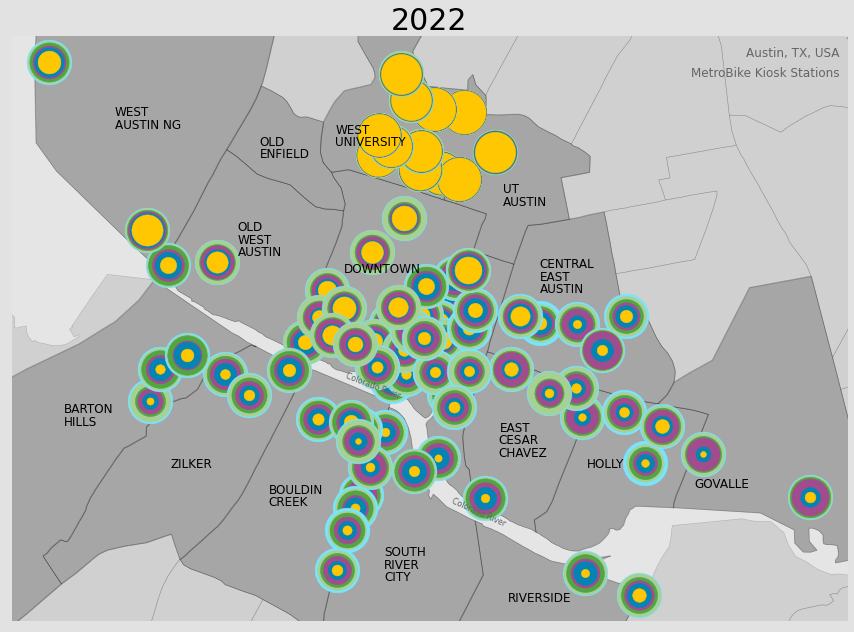

In [89]:
fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

color_dark_gray = '#5A5A5A'

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')

# ----------------------------------------------------------
# This is the Data here
# ----------------------------------------------------------
cnt = 0
for kiosk_id in result['Kiosk ID']:
    #print("Kiosk ID: ", kiosk_id)
    #print(cnt)
    # a row of data
    trow = result_last.loc[result_last['Kiosk ID']==kiosk_id].reset_index(drop=True).T.reset_index()
    
    trow_min = trow[1:8]
    #print(trow_min)
    trow_min.rename(columns = {'index':'Info',
                      0:'Trips'}, inplace = True)
    temp = trow_min.loc[trow_min['Trips'].notnull()].reset_index().sort_values(by = ["index"], ascending=False).reset_index(drop=True)
    #print(temp)
    
    for trips_, info, indx in zip(temp['Trips'],temp['Info'], temp['index']):
        #print(trips_)
        #print(info)
        
        msize = (temp.loc[temp['index'] <= indx, 'Trips'].sum())*20
        #print(msize/10)
        markercolor = 'red' # testing
        
        if 'Student' in info:
            markercolor = color_Student
            #print('Student')
        elif 'Annual' in info:
            markercolor = color_Annual
            #print('Annual')
        elif 'Monthly' in info:
            markercolor = color_Monthly
            #print('Monthly')
        elif 'Day' in info:
            markercolor = color_Day
            #print('Day')
        elif 'Single' in info:
            markercolor = color_SingleRide
            #print('Single Ride')
        elif 'Weekend' in info:
            markercolor = color_Weekend
            #print('Weekend')
        elif 'Other' in info:
            markercolor = color_Other 
            #print('Other')
        elif 'Weekly' in info:
            markercolor = color_Weekly     
            #print('Weekly')
            
        #print(msize)
        kiosk_geo.loc[kiosk_geo['Kiosk ID']==kiosk_id].plot(ax = ax, color=markercolor, markersize=msize, alpha=1)

    cnt +=1
    
    #if cnt >=10:
        #break
    
# ----------------------------------------------------------

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2817,"UT",color='black', 
        fontsize = 12)
plt.text(-97.7326,30.2805,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 12)
plt.text(-97.7505,30.274,"DOWNTOWN",color='black', 
        fontsize = 12)
plt.text(-97.732,30.242,"RIVERSIDE",color='black', 
        fontsize = 12)
plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"CESAR",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2561,"CHAVEZ",color='black', 
        fontsize = 12)
plt.text(-97.7231,30.2550,"HOLLY",color='black', 
        fontsize = 12)
plt.text(-97.711,30.253,"GOVALLE",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2744,"CENTRAL",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2732,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2720,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2863,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2851,"ENFIELD",color='black', 
        fontsize = 12)
plt.text(-97.770,30.255,"ZILKER",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2780,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2768,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2756,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2603,"BARTON",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2591,"HILLS",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2525,"BOULDIN",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2513,"CREEK",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2464,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2452,"RIVER",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2440,"CITY",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2892,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2880,"AUSTIN NG",color='black', 
        fontsize = 12)
plt.text(-97.7505,30.2617,"Colorado River",color='#606467', 
        fontsize = 7.9, rotation = -21)
plt.text(-97.7385,30.2493,"Colorado River",color='#606467', 
        fontsize = 7.9, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

plt.text(xlo+(xspace*4.95),yhi-0.002,"Austin, TX, USA",color='#656565', 
        fontsize = 12, horizontalalignment='right')
plt.text(xlo+(xspace*4.95),yhi-0.004,"MetroBike Kiosk Stations",color='#656565', 
        fontsize = 12, horizontalalignment='right')

# MAP 2020

In [90]:
yr_txt = '2020'

In [91]:
trips_temp = trips_2020
trips_Student = trips_temp.loc[trips_temp['Membership Type']=='Student']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Student.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Student Rides'}, 
                             inplace = True)
trips_Annual = trips_temp.loc[trips_temp['Membership Type']=='Annual']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Annual.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Annual Rides'}, 
                             inplace = True)
trips_Monthly = trips_temp.loc[trips_temp['Membership Type']=='Monthly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Monthly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Monthly Rides'}, 
                             inplace = True)
trips_Day = trips_temp.loc[trips_temp['Membership Type']=='Day']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Day.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Day Rides'}, 
                             inplace = True)
trips_SingleRide = trips_temp.loc[trips_temp['Membership Type']=='Single Ride']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_SingleRide.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Single Rides'}, 
                             inplace = True)
trips_Weekend = trips_temp.loc[trips_temp['Membership Type']=='3-Day Weekend']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekend.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekend Rides'}, 
                             inplace = True)
trips_Other = trips_temp.loc[trips_temp['Membership Type']=='Other']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Other.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Other Rides'}, 
                             inplace = True)
trips_all = trips_temp['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_all.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'All Rides'}, 
                             inplace = True)

test_kiosks = kiosk_geo['Kiosk ID'].to_frame()
result0 = test_kiosks.merge(trips_Student, how = "left", on=["Kiosk ID","Kiosk ID"])
result1 = result0.merge(trips_Annual, how = "left", on=["Kiosk ID","Kiosk ID"])
result2 = result1.merge(trips_Monthly, how = "left", on=["Kiosk ID","Kiosk ID"])
result3 = result2.merge(trips_Day, how = "left", on=["Kiosk ID","Kiosk ID"])
result4 = result3.merge(trips_SingleRide, how = "left", on=["Kiosk ID","Kiosk ID"])
result5 = result4.merge(trips_Weekend, how = "left", on=["Kiosk ID","Kiosk ID"])
result6 = result5.merge(trips_Other, how = "left", on=["Kiosk ID","Kiosk ID"])
result = result6.merge(trips_all, how = "left", on=["Kiosk ID","Kiosk ID"])

result.head(10)

Kiosk ID  Student Rides  Annual Rides  Monthly Rides  Day Rides  \
0      2823            3.0         101.0          127.0      111.0   
1      3291            2.0         676.0          157.0      104.0   
2      3292            NaN         136.0           97.0      157.0   
3      3293            NaN         132.0          143.0      135.0   
4      3294            7.0         120.0           49.0       82.0   
5      3377           20.0         479.0          189.0     1008.0   
6      3513            8.0         517.0          240.0      473.0   
7      3660            2.0         662.0          271.0      151.0   
8      3684            7.0         118.0           35.0      383.0   
9      3685           14.0         380.0          126.0      144.0   

   Single Rides  Weekend Rides  Other Rides  All Rides  
0          61.0            NaN          1.0      496.0  
1          76.0            NaN          NaN     1030.0  
2         177.0            NaN          2.0      614.0  
3          71.0            NaN          NaN      513.0  
4          84.0            NaN          NaN      349.0  
5         918.0            NaN          1.0     2732.0  
6         395.0            NaN          NaN     1729.0  
7         245.0            NaN          3.0     1384.0  
8         275.0            NaN          NaN      852.0  
9         113.0            NaN          2.0      829.0

In [92]:
result.sum()

Kiosk ID         341837.0
Student Rides      4669.0
Annual Rides      36547.0
Monthly Rides     13647.0
Day Rides         22150.0
Single Rides      20590.0
Weekend Rides         0.0
Other Rides         119.0
All Rides        102292.0
dtype: float64

In [93]:
trips_temp.groupby('Checkout Kiosk ID').size(
        ).nlargest(5)

Checkout Kiosk ID
2575.0    4027
2707.0    3969
4061.0    3480
2574.0    3068
2566.0    3038
dtype: int64

In [94]:
kiosk_geo.loc[kiosk_geo['Kiosk ID'] == 2574]['Latitude'].reset_index().iat[0, 1]

30.2659

Text(-97.69472848000001, 30.2929805, 'MetroBike Kiosk Stations')

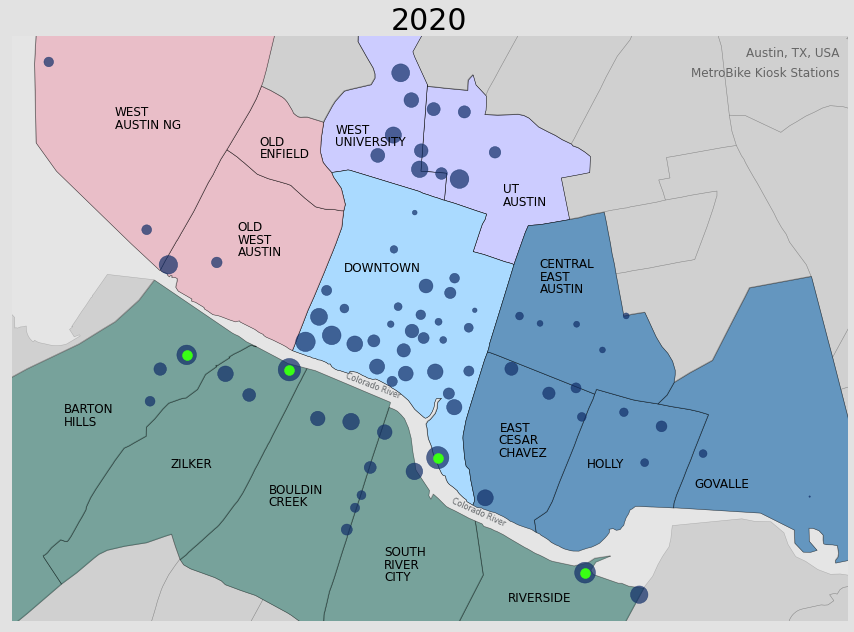

In [95]:
markersize = result['All Rides']/8

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#CCCCFF",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#CCCCFF",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#aadaff",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.75, color="#f2b8c6",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.75, color="#f2b8c6",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.75, color="#f2b8c6",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.70, color="#377eb8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.70, color="#377eb8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.70, color="#377eb8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.70, color="#377eb8",edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_navy,markersize=markersize, alpha=0.70)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2575].plot(
    ax = ax, color="#39FF14",markersize=100, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2707].plot(
    ax = ax, color="#39FF14",markersize=100, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 4061].plot(
    ax = ax, color="#39FF14",markersize=100, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2574].plot(
    ax = ax, color="#39FF14",markersize=100, alpha=1)
#plt.text(kiosk_geo.loc[kiosk_geo['Kiosk ID'] == 2574]['Longitude'].reset_index().iat[0, 1],
#         kiosk_geo.loc[kiosk_geo['Kiosk ID'] == 2574]['Latitude'].reset_index().iat[0, 1],
#         "4",color='black', fontsize = 10, ha='center',va='center')

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2817,"UT",color='black', 
        fontsize = 12)
plt.text(-97.7326,30.2805,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 12)
plt.text(-97.7505,30.274,"DOWNTOWN",color='black', 
        fontsize = 12)
plt.text(-97.732,30.242,"RIVERSIDE",color='black', 
        fontsize = 12)
plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"CESAR",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2561,"CHAVEZ",color='black', 
        fontsize = 12)
plt.text(-97.7231,30.2550,"HOLLY",color='black', 
        fontsize = 12)
plt.text(-97.711,30.253,"GOVALLE",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2744,"CENTRAL",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2732,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2720,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2863,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2851,"ENFIELD",color='black', 
        fontsize = 12)
plt.text(-97.770,30.255,"ZILKER",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2780,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2768,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2756,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2603,"BARTON",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2591,"HILLS",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2525,"BOULDIN",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2513,"CREEK",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2464,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2452,"RIVER",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2440,"CITY",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2892,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2880,"AUSTIN NG",color='black', 
        fontsize = 12)
plt.text(-97.7505,30.2617,"Colorado River",color='#606467', 
        fontsize = 7.9, rotation = -21)
plt.text(-97.7385,30.2493,"Colorado River",color='#606467', 
        fontsize = 7.9, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

plt.text(xlo+(xspace*4.95),yhi-0.002,"Austin, TX, USA",color='#656565', 
        fontsize = 12, horizontalalignment='right')
plt.text(xlo+(xspace*4.95),yhi-0.004,"MetroBike Kiosk Stations",color='#656565', 
        fontsize = 12, horizontalalignment='right')

In [96]:
# ANOTHER Fake Kiosk Dataframe - for Legend
legdf2 = pd.DataFrame()
row2 = {'Kiosk ID': 2, 'Kiosk Name': 'Annual', 'Kiosk Status': 'Unknown',
        'Location': '(30.2764, -97.710)','Address': 'None','Alternate Name': '',
        'City Asset Number': '','Property Type': '','Number of Docks': '',
        'Power Type': '','Footprint Length': '','Footprint Width': '',
        'Notes': '','Council District': 0,'Image': '','Modified Date': '', 
        'All Rides': 1000}
legdf2 = legdf2.append(row2, ignore_index = True)
row3 = {'Kiosk ID': 3, 'Kiosk Name': 'Monthly', 'Kiosk Status': 'Unknown',
        'Location': '(30.2795, -97.710)','Address': 'None','Alternate Name': '',
        'City Asset Number': '','Property Type': '','Number of Docks': '',
        'Power Type': '','Footprint Length': '','Footprint Width': '',
        'Notes': '','Council District': 0,'Image': '','Modified Date': '', 
        'All Rides': 1000}
legdf2 = legdf2.append(row3, ignore_index = True)
row4 = {'Kiosk ID': 4, 'Kiosk Name': 'Student', 'Kiosk Status': 'Unknown',
        'Location': '(30.2826, -97.710)','Address': 'None','Alternate Name': '',
        'City Asset Number': '','Property Type': '','Number of Docks': '',
        'Power Type': '','Footprint Length': '','Footprint Width': '',
        'Notes': '','Council District': 0,'Image': '','Modified Date': '', 
        'All Rides': 1000}
legdf2 = legdf2.append(row4, ignore_index = True)
row5 = {'Kiosk ID': 5, 'Kiosk Name': 'Single', 'Kiosk Status': 'Unknown',
        'Location': '(30.2857, -97.710)','Address': 'None','Alternate Name': '',
        'City Asset Number': '','Property Type': '','Number of Docks': '',
        'Power Type': '','Footprint Length': '','Footprint Width': '',
        'Notes': '','Council District': 0,'Image': '','Modified Date': '', 
        'All Rides': 1000}
legdf2 = legdf2.append(row5, ignore_index = True)
row6 = {'Kiosk ID': 5, 'Kiosk Name': 'Day', 'Kiosk Status': 'Unknown',
        'Location': '(30.2888, -97.710)','Address': 'None','Alternate Name': '',
        'City Asset Number': '','Property Type': '','Number of Docks': '',
        'Power Type': '','Footprint Length': '','Footprint Width': '',
        'Notes': '','Council District': 0,'Image': '','Modified Date': '', 
        'All Rides': 1000}
legdf2 = legdf2.append(row6, ignore_index = True)
row7 = {'Kiosk ID': 6, 'Kiosk Name': 'Weekend', 'Kiosk Status': 'Unknown',
        'Location': '(30.2919, -97.710)','Address': 'None','Alternate Name': '',
        'City Asset Number': '','Property Type': '','Number of Docks': '',
        'Power Type': '','Footprint Length': '','Footprint Width': '',
        'Notes': '','Council District': 0,'Image': '','Modified Date': '', 
        'All Rides': 1000}

legdf2 = legdf2.append(row7, ignore_index = True)

loc_full = legdf2['Location']
loc_full
loc_split = loc_full.str.split(',', n=- 1, expand=True)
lat_0 = loc_split[0]
lon_0 = loc_split[1]

lat = lat_0.str.replace('(', '')
lon = lon_0.str.replace(')', '')

legdf2["Latitude"] = lat.astype('float')
legdf2["Longitude"] = lon.astype('float')

geometry = [Point(xy) for xy in zip( legdf2["Longitude"], legdf2["Latitude"])]
geometry[:3]

crs = "EPSG:4326"

# create geo-DataFrame
legdf2_geo = gpd.GeoDataFrame(legdf2,crs = crs,
                         geometry = geometry)

Text(-97.7077, 30.2919, 'Weekend')

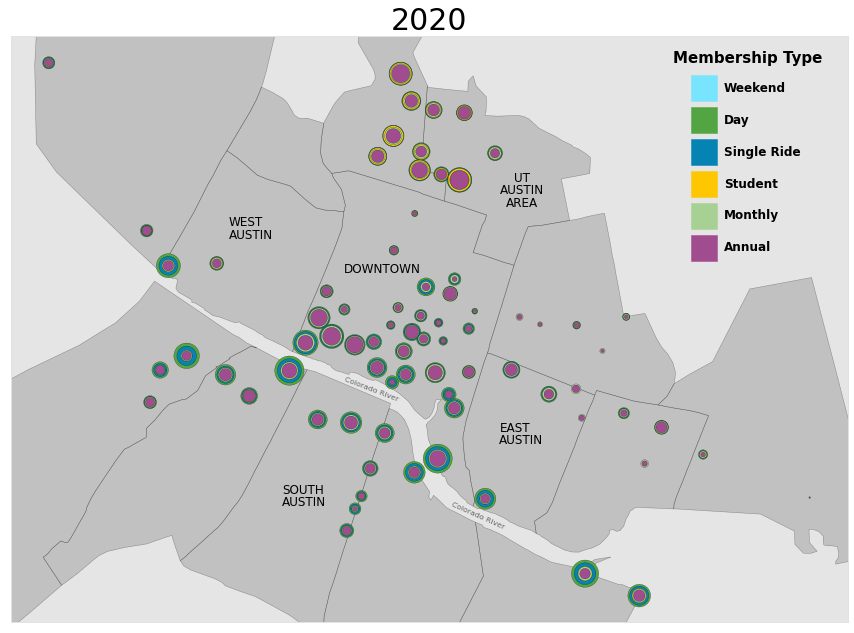

In [97]:
markersize1 = result['Annual Rides']/4.5
markersize2 = markersize1 + result['Monthly Rides']/4.5
markersize3 = markersize2 + result['Student Rides']/4.5
markersize4 = markersize3 + result['Single Rides']/4.5
markersize5 = markersize4 + result['Day Rides']/4.5
markersize6 = markersize5 + result['Weekend Rides']/4.5

fig,ax = plt.subplots(figsize = (15,15))
#base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.01, color="gray",edgecolor='black')

# Neighborhoods
alpha_temp = 0.350
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_Weekend,markersize=markersize6, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Day,markersize=markersize5, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_SingleRide,markersize=markersize4, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Student,markersize=markersize3, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Monthly,markersize=markersize2, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Annual,markersize=markersize1, alpha=1, edgecolor='black', linewidth=0.2)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7305,30.28280,"UT",color='black', 
        fontsize = 12, horizontalalignment = 'center')
plt.text(-97.7305,30.2816,"AUSTIN",color='black', 
        fontsize = 12, horizontalalignment = 'center')
plt.text(-97.7305,30.2804,"AREA",color='black', 
        fontsize = 12, horizontalalignment = 'center')

plt.text(-97.7505,30.27395,"DOWNTOWN",color='black', 
        fontsize = 12)


plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"AUSTIN",color='black', 
        fontsize = 12)

plt.text(-97.7635,30.2785,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7635,30.2773,"AUSTIN",color='black', 
        fontsize = 12)

plt.text(-97.7575,30.2525,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.7575,30.2513,"AUSTIN",color='black', 
        fontsize = 12)


plt.text(-97.7505,30.26145,"Colorado River",color='#606467', 
        fontsize = 7.80, rotation = -21)
plt.text(-97.7385,30.2490,"Colorado River",color='#606467', 
        fontsize = 7.80, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor(color="white")
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Annual'].plot(ax = ax, color=color_Annual,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Monthly'].plot(ax = ax, color=color_Monthly,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Student'].plot(ax = ax, color=color_Student,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Single'].plot(ax = ax, color=color_SingleRide,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Day'].plot(ax = ax, color=color_Day,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Weekend'].plot(ax = ax, color=color_Weekend,markersize=700, alpha=1, marker='s')

plt.text(-97.705,30.2900+0.0048,"Membership Type",color='black', backgroundcolor = '#e5e5e5', va='center', ha='center',
        fontsize = 15, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2764,"Annual",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2795,"Monthly",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2826,"Student",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2857,"Single Ride",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2888,"Day",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2919,"Weekend",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)

# MAP 2021

In [98]:
yr_txt = '2021'

In [99]:
trips_temp = trips_2021
trips_Student = trips_temp.loc[trips_temp['Membership Type']=='Student']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Student.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Student Rides'}, 
                             inplace = True)
trips_Annual = trips_temp.loc[trips_temp['Membership Type']=='Annual']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Annual.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Annual Rides'}, 
                             inplace = True)
trips_Monthly = trips_temp.loc[trips_temp['Membership Type']=='Monthly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Monthly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Monthly Rides'}, 
                             inplace = True)
trips_Day = trips_temp.loc[trips_temp['Membership Type']=='Day']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Day.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Day Rides'}, 
                             inplace = True)
trips_SingleRide = trips_temp.loc[trips_temp['Membership Type']=='Single Ride']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_SingleRide.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Single Rides'}, 
                             inplace = True)
trips_Weekend = trips_temp.loc[trips_temp['Membership Type']=='3-Day Weekend']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekend.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekend Rides'}, 
                             inplace = True)
trips_Other = trips_temp.loc[trips_temp['Membership Type']=='Other']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Other.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Other Rides'}, 
                             inplace = True)
trips_all = trips_temp['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_all.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'All Rides'}, 
                             inplace = True)

test_kiosks = kiosk_geo['Kiosk ID'].to_frame()
result0 = test_kiosks.merge(trips_Student, how = "left", on=["Kiosk ID","Kiosk ID"])
result1 = result0.merge(trips_Annual, how = "left", on=["Kiosk ID","Kiosk ID"])
result2 = result1.merge(trips_Monthly, how = "left", on=["Kiosk ID","Kiosk ID"])
result3 = result2.merge(trips_Day, how = "left", on=["Kiosk ID","Kiosk ID"])
result4 = result3.merge(trips_SingleRide, how = "left", on=["Kiosk ID","Kiosk ID"])
result5 = result4.merge(trips_Weekend, how = "left", on=["Kiosk ID","Kiosk ID"])
result6 = result5.merge(trips_Other, how = "left", on=["Kiosk ID","Kiosk ID"])
result = result6.merge(trips_all, how = "left", on=["Kiosk ID","Kiosk ID"])

result.head(10)

Kiosk ID  Student Rides  Annual Rides  Monthly Rides  Day Rides  \
0      2823           21.0         309.0          289.0      118.0   
1      3291           23.0         835.0          161.0      216.0   
2      3292            7.0         622.0          415.0      275.0   
3      3293           10.0         317.0          241.0      204.0   
4      3294           64.0         135.0          127.0      174.0   
5      3377          129.0         534.0          549.0     1203.0   
6      3513           62.0         775.0          336.0      608.0   
7      3660           72.0         804.0          720.0      337.0   
8      3684           51.0         207.0          175.0      693.0   
9      3685          117.0         568.0          493.0      240.0   

   Single Rides  Weekend Rides  Other Rides  All Rides  
0         126.0            NaN          NaN      912.0  
1         115.0            NaN          NaN     1460.0  
2         212.0            NaN          1.0     1665.0  
3         125.0            NaN          1.0     1032.0  
4         121.0            NaN          NaN      684.0  
5        1102.0            NaN          NaN     3694.0  
6         459.0            NaN          NaN     2570.0  
7         365.0            NaN          NaN     2611.0  
8         492.0            NaN          NaN     1878.0  
9         196.0            NaN          NaN     1792.0

In [100]:
result.sum()

Kiosk ID         341837.0
Student Rides     59080.0
Annual Rides      51581.0
Monthly Rides     36838.0
Day Rides         34405.0
Single Rides      30098.0
Weekend Rides         0.0
Other Rides          16.0
All Rides        223989.0
dtype: float64

In [101]:
trips_temp.groupby('Checkout Kiosk ID').size(
        ).nlargest(5)

Checkout Kiosk ID
3798.0    17665
3793.0     9795
3795.0     8430
2548.0     7606
7188.0     7532
dtype: int64

Text(-97.69472848000001, 30.2929805, 'MetroBike Kiosk Stations')

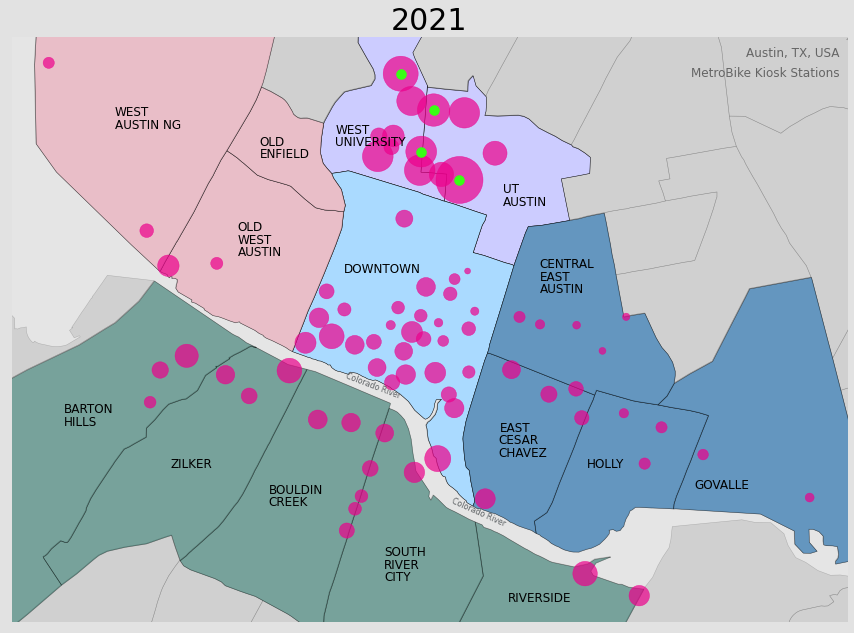

In [102]:
markersize = result['All Rides']/8

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#CCCCFF",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#CCCCFF",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="#aadaff",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.75, color="#f2b8c6",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.75, color="#f2b8c6",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.75, color="#f2b8c6",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.5, color="#207567",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.70, color="#377eb8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.70, color="#377eb8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.70, color="#377eb8",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.70, color="#377eb8",edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_light,markersize=markersize, alpha=0.70)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3798].plot(
    ax = ax, color="#39FF14",markersize=100, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3793].plot(
    ax = ax, color="#39FF14",markersize=100, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 3795].plot(
    ax = ax, color="#39FF14",markersize=100, alpha=1)
kiosk_geo[kiosk_geo['Kiosk ID'] == 2548].plot(
    ax = ax, color="#39FF14",markersize=100, alpha=1)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2817,"UT",color='black', 
        fontsize = 12)
plt.text(-97.7326,30.2805,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 12)
plt.text(-97.7505,30.274,"DOWNTOWN",color='black', 
        fontsize = 12)
plt.text(-97.732,30.242,"RIVERSIDE",color='black', 
        fontsize = 12)
plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"CESAR",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2561,"CHAVEZ",color='black', 
        fontsize = 12)
plt.text(-97.7231,30.2550,"HOLLY",color='black', 
        fontsize = 12)
plt.text(-97.711,30.253,"GOVALLE",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2744,"CENTRAL",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2732,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2720,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2863,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2851,"ENFIELD",color='black', 
        fontsize = 12)
plt.text(-97.770,30.255,"ZILKER",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2780,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2768,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2756,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2603,"BARTON",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2591,"HILLS",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2525,"BOULDIN",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2513,"CREEK",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2464,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2452,"RIVER",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2440,"CITY",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2892,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2880,"AUSTIN NG",color='black', 
        fontsize = 12)
plt.text(-97.7505,30.2617,"Colorado River",color='#606467', 
        fontsize = 7.9, rotation = -21)
plt.text(-97.7385,30.2493,"Colorado River",color='#606467', 
        fontsize = 7.9, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

plt.text(xlo+(xspace*4.95),yhi-0.002,"Austin, TX, USA",color='#656565', 
        fontsize = 12, horizontalalignment='right')
plt.text(xlo+(xspace*4.95),yhi-0.004,"MetroBike Kiosk Stations",color='#656565', 
        fontsize = 12, horizontalalignment='right')

Text(-97.7077, 30.2919, 'Weekend')

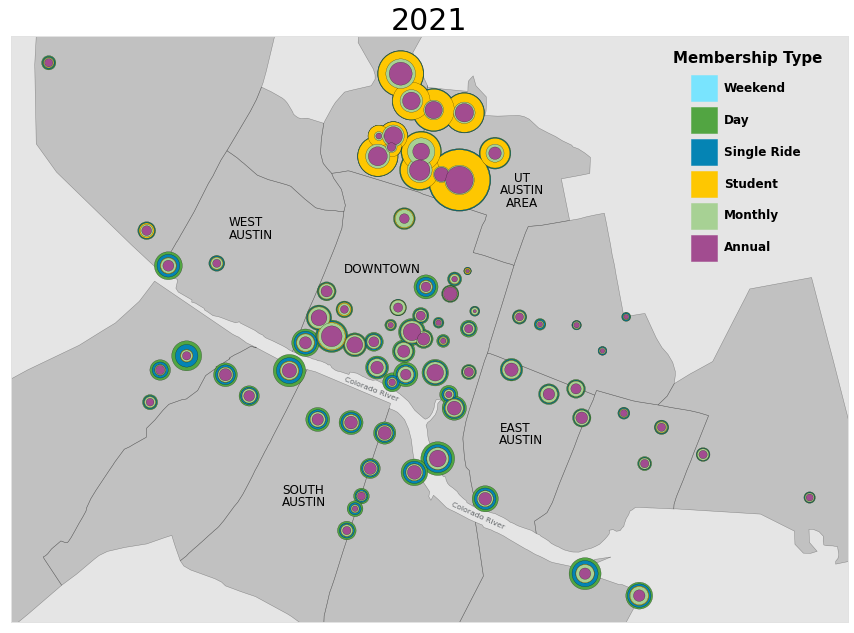

In [103]:
markersize1 = result['Annual Rides']/4.5
markersize2 = markersize1 + result['Monthly Rides']/4.5
markersize3 = markersize2 + result['Student Rides']/4.5
markersize4 = markersize3 + result['Single Rides']/4.5
markersize5 = markersize4 + result['Day Rides']/4.5
markersize6 = markersize5 + result['Weekend Rides']/4.5

fig,ax = plt.subplots(figsize = (15,15))
#base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.01, color="gray",edgecolor='black')

# Neighborhoods
alpha_temp = 0.350
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_Weekend,markersize=markersize6, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Day,markersize=markersize5, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_SingleRide,markersize=markersize4, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Student,markersize=markersize3, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Monthly,markersize=markersize2, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Annual,markersize=markersize1, alpha=1, edgecolor='black', linewidth=0.2)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7305,30.28280,"UT",color='black', 
        fontsize = 12, horizontalalignment = 'center')
plt.text(-97.7305,30.2816,"AUSTIN",color='black', 
        fontsize = 12, horizontalalignment = 'center')
plt.text(-97.7305,30.2804,"AREA",color='black', 
        fontsize = 12, horizontalalignment = 'center')

plt.text(-97.7505,30.27395,"DOWNTOWN",color='black', 
        fontsize = 12)


plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"AUSTIN",color='black', 
        fontsize = 12)

plt.text(-97.7635,30.2785,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7635,30.2773,"AUSTIN",color='black', 
        fontsize = 12)

plt.text(-97.7575,30.2525,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.7575,30.2513,"AUSTIN",color='black', 
        fontsize = 12)


plt.text(-97.7505,30.26145,"Colorado River",color='#606467', 
        fontsize = 7.80, rotation = -21)
plt.text(-97.7385,30.2490,"Colorado River",color='#606467', 
        fontsize = 7.80, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor(color="white")
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Annual'].plot(ax = ax, color=color_Annual,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Monthly'].plot(ax = ax, color=color_Monthly,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Student'].plot(ax = ax, color=color_Student,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Single'].plot(ax = ax, color=color_SingleRide,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Day'].plot(ax = ax, color=color_Day,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Weekend'].plot(ax = ax, color=color_Weekend,markersize=700, alpha=1, marker='s')

plt.text(-97.705,30.2900+0.0048,"Membership Type",color='black', backgroundcolor = '#e5e5e5', va='center', ha='center',
        fontsize = 15, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2764,"Annual",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2795,"Monthly",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2826,"Student",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2857,"Single Ride",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2888,"Day",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2919,"Weekend",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)

# MAP 2022

In [104]:
yr_txt = '2022'

In [105]:
trips_temp = trips_2022
trips_Student = trips_temp.loc[trips_temp['Membership Type']=='Student']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Student.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Student Rides'}, 
                             inplace = True)
trips_Annual = trips_temp.loc[trips_temp['Membership Type']=='Annual']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Annual.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Annual Rides'}, 
                             inplace = True)
trips_Monthly = trips_temp.loc[trips_temp['Membership Type']=='Monthly']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Monthly.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Monthly Rides'}, 
                             inplace = True)
trips_Day = trips_temp.loc[trips_temp['Membership Type']=='Day']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Day.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Day Rides'}, 
                             inplace = True)
trips_SingleRide = trips_temp.loc[trips_temp['Membership Type']=='Single Ride']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_SingleRide.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Single Rides'}, 
                             inplace = True)
trips_Weekend = trips_temp.loc[trips_temp['Membership Type']=='3-Day Weekend']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Weekend.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Weekend Rides'}, 
                             inplace = True)
trips_Other = trips_temp.loc[trips_temp['Membership Type']=='Other']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Other.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Other Rides'}, 
                             inplace = True)
trips_all = trips_temp['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_all.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'All Rides'}, 
                             inplace = True)

test_kiosks = kiosk_geo['Kiosk ID'].to_frame()
result0 = test_kiosks.merge(trips_Student, how = "left", on=["Kiosk ID","Kiosk ID"])
result1 = result0.merge(trips_Annual, how = "left", on=["Kiosk ID","Kiosk ID"])
result2 = result1.merge(trips_Monthly, how = "left", on=["Kiosk ID","Kiosk ID"])
result3 = result2.merge(trips_Day, how = "left", on=["Kiosk ID","Kiosk ID"])
result4 = result3.merge(trips_SingleRide, how = "left", on=["Kiosk ID","Kiosk ID"])
result5 = result4.merge(trips_Weekend, how = "left", on=["Kiosk ID","Kiosk ID"])
result6 = result5.merge(trips_Other, how = "left", on=["Kiosk ID","Kiosk ID"])
result = result6.merge(trips_all, how = "left", on=["Kiosk ID","Kiosk ID"])

result.head(10)

Kiosk ID  Student Rides  Annual Rides  Monthly Rides  Day Rides  \
0      2823           19.0         489.0          281.0      117.0   
1      3291           48.0         243.0          158.0      154.0   
2      3292           40.0         538.0          328.0      193.0   
3      3293           28.0         112.0          165.0      215.0   
4      3294          199.0         229.0          212.0      127.0   
5      3377          369.0         417.0          305.0      815.0   
6      3513          110.0         511.0          525.0      744.0   
7      3660          313.0        1358.0          716.0      329.0   
8      3684          179.0         271.0          326.0      766.0   
9      3685          315.0         401.0          612.0      191.0   

   Single Rides  Weekend Rides  Other Rides  All Rides  
0         110.0            NaN          NaN     1118.0  
1          89.0            NaN          NaN      833.0  
2         154.0            NaN          NaN     1401.0  
3         133.0            NaN          NaN      933.0  
4          95.0            NaN          NaN      967.0  
5         609.0            NaN          NaN     2757.0  
6         474.0            NaN          NaN     2877.0  
7         315.0            NaN          NaN     3401.0  
8         570.0            NaN          NaN     2622.0  
9         163.0            NaN          NaN     1824.0

In [106]:
result.sum()

Kiosk ID         341837.0
Student Rides    149391.0
Annual Rides      32788.0
Monthly Rides     44693.0
Day Rides         30335.0
Single Rides      24695.0
Weekend Rides         0.0
Other Rides          31.0
All Rides        299635.0
dtype: float64

In [107]:
trips_temp.groupby('Checkout Kiosk ID').size(
        ).nlargest(5)

Checkout Kiosk ID
3798.0    33588
2498.0    17758
3838.0    15202
3795.0    13320
2547.0    12034
dtype: int64

In [108]:
# Fake Kiosk Dataframe - for Legend
legdf = pd.DataFrame()

row2 = {'Kiosk ID': 2, 'Kiosk Name': 'Two', 'Kiosk Status': 'Unknown','Location': '(30.2808, -97.700)','Address': 'None','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 0,'Image': '','Modified Date': '', 'All Rides': 3000}
legdf = legdf.append(row2, ignore_index = True)
row3 = {'Kiosk ID': 3, 'Kiosk Name': 'Three', 'Kiosk Status': 'Unknown','Location': '(30.2832, -97.700)','Address': 'None','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 0,'Image': '','Modified Date': '', 'All Rides': 5000}
legdf = legdf.append(row3, ignore_index = True)
row4 = {'Kiosk ID': 4, 'Kiosk Name': 'Four', 'Kiosk Status': 'Unknown','Location': '(30.2865, -97.700)','Address': 'None','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 0,'Image': '','Modified Date': '', 'All Rides': 10000}
legdf = legdf.append(row4, ignore_index = True)
row5 = {'Kiosk ID': 5, 'Kiosk Name': 'Five', 'Kiosk Status': 'Unknown','Location': '(30.2912, -97.700)','Address': 'None','Alternate Name': '','City Asset Number': '','Property Type': '','Number of Docks': '','Power Type': '','Footprint Length': '','Footprint Width': '','Notes': '','Council District': 0,'Image': '','Modified Date': '', 'All Rides': 20000}
legdf = legdf.append(row5, ignore_index = True)

loc_full = legdf['Location']
loc_full
loc_split = loc_full.str.split(',', n=- 1, expand=True)
lat_0 = loc_split[0]
lon_0 = loc_split[1]

# print(lat_0[1][1:-1])

lat = lat_0.str.replace('(', '')
lon = lon_0.str.replace(')', '')

legdf["Latitude"] = lat.astype('float')
legdf["Longitude"] = lon.astype('float')

geometry = [Point(xy) for xy in zip( legdf["Longitude"], legdf["Latitude"])]
geometry[:3]

crs = "EPSG:4326"

# create geo-DataFrame
legdf_geo = gpd.GeoDataFrame(legdf,crs = crs,
                         geometry = geometry)

Text(-97.7001, 30.2912, '20K')

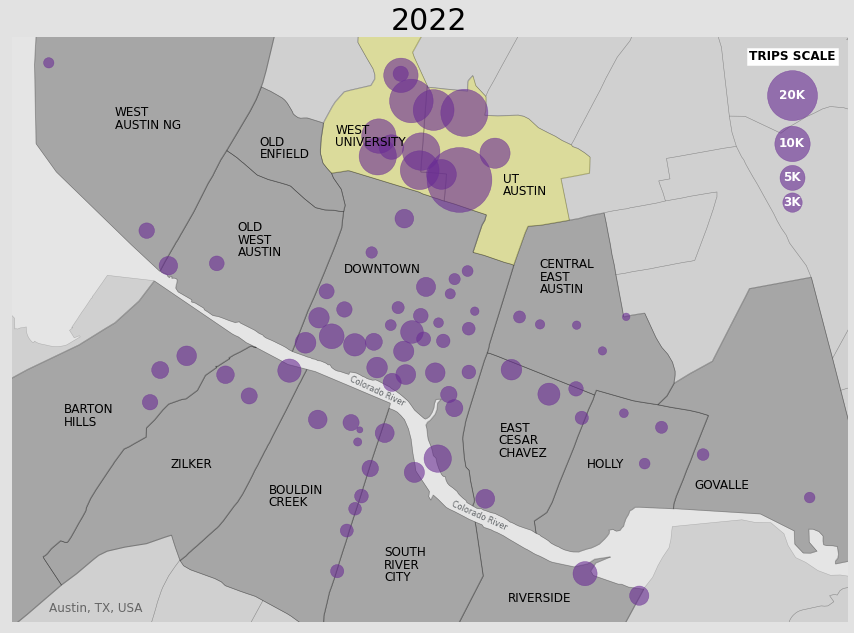

In [109]:
msize_divby = 8
markersize = result['All Rides']/msize_divby

fig,ax = plt.subplots(figsize = (15,15))
base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.2, color="gray",edgecolor='black')

color_dark_gray = '#5A5A5A'

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.25, color='yellow',edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.35, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.350, color=color_dark_gray,edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_dark,markersize=markersize, alpha=0.60)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7326,30.2827,"UT",color='black', 
        fontsize = 12)
plt.text(-97.7326,30.2815,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2875,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7515,30.2863,"UNIVERSITY",color='black', 
        fontsize = 12)
plt.text(-97.7505,30.274,"DOWNTOWN",color='black', 
        fontsize = 12)
plt.text(-97.732,30.242,"RIVERSIDE",color='black', 
        fontsize = 12)
plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"CESAR",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2561,"CHAVEZ",color='black', 
        fontsize = 12)
plt.text(-97.7231,30.2550,"HOLLY",color='black', 
        fontsize = 12)
plt.text(-97.711,30.253,"GOVALLE",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2744,"CENTRAL",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2732,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7285,30.2720,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2863,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.760,30.2851,"ENFIELD",color='black', 
        fontsize = 12)
plt.text(-97.770,30.255,"ZILKER",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2780,"OLD",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2768,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7625,30.2756,"AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2603,"BARTON",color='black', 
        fontsize = 12)
plt.text(-97.782,30.2591,"HILLS",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2525,"BOULDIN",color='black', 
        fontsize = 12)
plt.text(-97.759,30.2513,"CREEK",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2464,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2452,"RIVER",color='black', 
        fontsize = 12)
plt.text(-97.746,30.2440,"CITY",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2892,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7763,30.2880,"AUSTIN NG",color='black', 
        fontsize = 12)
plt.text(-97.7500,30.26105,"Colorado River",color='#606467', 
        fontsize = 8, rotation = -25)
plt.text(-97.7385,30.24895,"Colorado River",color='#606467', 
        fontsize = 8, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor('#e2e2e2')
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

plt.text(xlo+(xspace*0.79),ylo+0.0010,"Austin, TX, USA",color='#656565', 
        fontsize = 12, horizontalalignment='right')

# Create legend
legdf_geo.plot(ax = ax, color=color_dark,markersize=legdf_geo['All Rides']/msize_divby, alpha=0.60)
plt.text(-97.700,30.2900+0.005,"TRIPS SCALE",color='black', backgroundcolor = 'white', va='center', ha='center',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7001,30.2808,"3K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2832,"5K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2865,"10K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)
plt.text(-97.7001,30.2912,"20K",color='white', va='center', ha='center', weight = 'bold',
        fontsize = 12, rotation = 0)

In [110]:
print(msize_divby)

8


In [111]:
30.2585-30.2573

0.001200000000000756

In [112]:
30.2816-0.001200000000000756


30.2804

Text(-97.7077, 30.2919, 'Weekend')

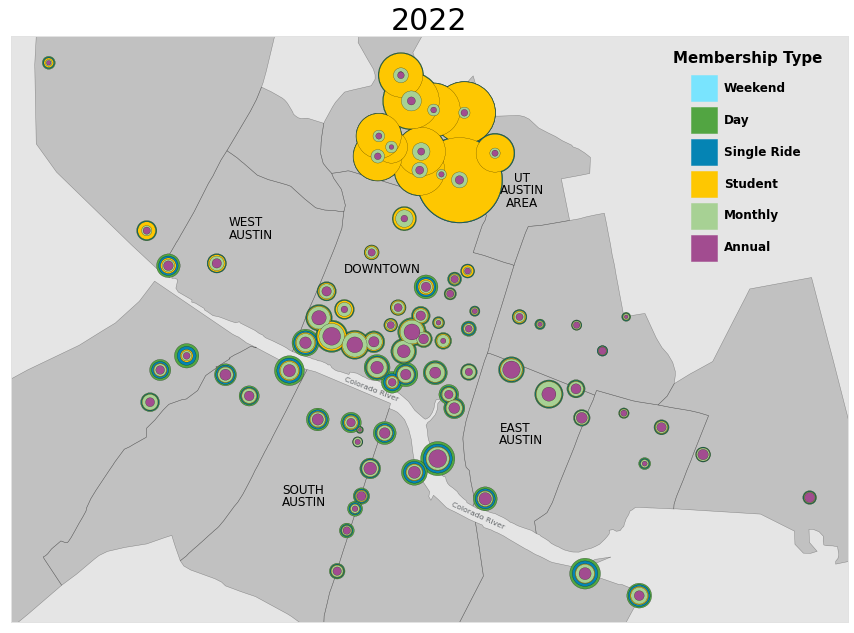

In [113]:
markersize1 = result['Annual Rides']/4.5
markersize2 = markersize1 + result['Monthly Rides']/4.5
markersize3 = markersize2 + result['Student Rides']/4.5
markersize4 = markersize3 + result['Single Rides']/4.5
markersize5 = markersize4 + result['Day Rides']/4.5
markersize6 = markersize5 + result['Weekend Rides']/4.5

fig,ax = plt.subplots(figsize = (15,15))
#base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.01, color="gray",edgecolor='black')

# Neighborhoods
alpha_temp = 0.350
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=alpha_temp, color="gray",edgecolor='black')

kiosk_geo.plot(ax = ax, color=color_Weekend,markersize=markersize6, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Day,markersize=markersize5, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_SingleRide,markersize=markersize4, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Student,markersize=markersize3, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Monthly,markersize=markersize2, alpha=1, edgecolor='black', linewidth=0.2)
kiosk_geo.plot(ax = ax, color=color_Annual,markersize=markersize1, alpha=1, edgecolor='black', linewidth=0.2)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.7305,30.28280,"UT",color='black', 
        fontsize = 12, horizontalalignment = 'center')
plt.text(-97.7305,30.2816,"AUSTIN",color='black', 
        fontsize = 12, horizontalalignment = 'center')
plt.text(-97.7305,30.2804,"AREA",color='black', 
        fontsize = 12, horizontalalignment = 'center')

plt.text(-97.7505,30.27395,"DOWNTOWN",color='black', 
        fontsize = 12)


plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"AUSTIN",color='black', 
        fontsize = 12)

plt.text(-97.7635,30.2785,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7635,30.2773,"AUSTIN",color='black', 
        fontsize = 12)

plt.text(-97.7575,30.2525,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.7575,30.2513,"AUSTIN",color='black', 
        fontsize = 12)


plt.text(-97.7505,30.26145,"Colorado River",color='#606467', 
        fontsize = 7.80, rotation = -21)
plt.text(-97.7385,30.2490,"Colorado River",color='#606467', 
        fontsize = 7.80, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor(color="white")
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Annual'].plot(ax = ax, color=color_Annual,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Monthly'].plot(ax = ax, color=color_Monthly,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Student'].plot(ax = ax, color=color_Student,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Single'].plot(ax = ax, color=color_SingleRide,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Day'].plot(ax = ax, color=color_Day,markersize=700, alpha=1, marker='s')
legdf2_geo.loc[legdf2_geo['Kiosk Name'] == 'Weekend'].plot(ax = ax, color=color_Weekend,markersize=700, alpha=1, marker='s')

plt.text(-97.705,30.2900+0.0048,"Membership Type",color='black', backgroundcolor = '#e5e5e5', va='center', ha='center',
        fontsize = 15, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2764,"Annual",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2795,"Monthly",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2826,"Student",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2857,"Single Ride",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2888,"Day",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)
plt.text(-97.7077,30.2919,"Weekend",color='black', backgroundcolor = '#e5e5e5', va='center', ha='left',
        fontsize = 12, weight = 'bold', rotation = 0)

In [114]:
#membership_categories = ["Student", "Single Ride", "Annual", "Day", "Monthly", "Weekend","Other"]

In [115]:
trips_2022.loc[trips_2022['Neighborhood Group Checkout']=='DOWNTOWN']['Membership Type'].value_counts(normalize=True)*100

Monthly        28.980258
Annual         20.595135
Day            16.542509
Single Ride    11.696917
Student        11.613231
Weekend        10.566462
Other           0.005488
Name: Membership Type, dtype: float64

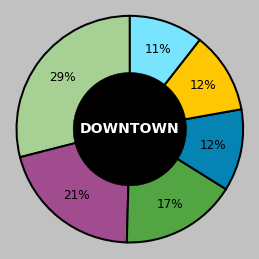

In [116]:
# DOWNTOWN
temp = (trips_2022.loc[trips_2022['Neighborhood Group Checkout']=='DOWNTOWN']['Membership Type'].value_counts(normalize=True)*100)
temp = temp.loc[temp>1].to_frame().reset_index()
#temp["index"] = pd.Categorical(temp["index"], categories = membership_categories)
#temp = temp.sort_values(by = "index")

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = temp['index'].to_list()
sizes = temp['Membership Type'].to_list()
explode = (0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = [color_Monthly,
          color_Annual,
          color_Day,
          color_SingleRide,
          color_Student,
          color_Weekend]

fig1, ax = plt.subplots(figsize = (4,4))
ax.pie(sizes, explode=explode, colors=colors, autopct='%1.0f%%',
       textprops={'fontsize': 12},
       wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        shadow=False, startangle=90, pctdistance=0.75)

#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='black', color ='black' )
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.text(0,0,"DOWNTOWN", fontsize = 14, weight = 'bold',ha='center',va='center',color='white')
plt.tight_layout()

fig1.patch.set_facecolor('#c1c1c1')
#plt.title('DOWNTOWN',fontsize=14)
plt.show()

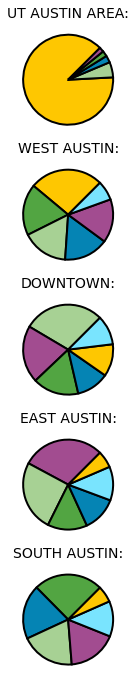

In [117]:
# Amazingly helpful write-up
# https://towardsdatascience.com/plot-organization-in-matplotlib-your-one-stop-guide-if-you-are-reading-this-it-is-probably-f79c2dcbc801

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

time = np.linspace(0, 10, 1000)
height = np.sin(time)
weight = time*0.3 + 2
score = time**2 + height
distribution = np.random.normal(0, 1, len(time))

fig = plt.figure(figsize=(3, 12))
gs = GridSpec(nrows=5, ncols=1)

# ---------------------------------
# UT AUSTIN AREA
# ---------------------------------
temp = (trips_2022.loc[trips_2022['Neighborhood Group Checkout']=='UT AUSTIN AREA']['Membership Type'].value_counts(normalize=True)*100)
temp = temp.loc[temp>1].to_frame().reset_index()
labels = temp['index'].to_list()
sizes = temp['Membership Type'].to_list()
explode = (0, 0, 0, 0, 0)  
colors = [color_Student,
          color_Monthly,
          color_SingleRide,
          color_Day,
          color_Annual,
          color_Weekend,
          color_Other]

ax0 = fig.add_subplot(gs[0, 0])
ax0.pie(sizes, explode=explode, colors=colors, autopct='%1.0f%%',
       textprops={'fontsize': 0},
       wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        shadow=False, startangle=45, pctdistance=0)
ax0.set_title('UT AUSTIN AREA:',fontsize=14)
# ---------------------------------

# ---------------------------------
# WEST AUSTIN
# ---------------------------------
temp = (trips_2022.loc[trips_2022['Neighborhood Group Checkout']=='WEST AUSTIN']['Membership Type'].value_counts(normalize=True)*100)
temp = temp.loc[temp>1].to_frame().reset_index()
labels = temp['index'].to_list()
sizes = temp['Membership Type'].to_list()
explode = (0, 0, 0, 0, 0, 0)  

colors = [color_Student,
          color_Day,
          color_Monthly,
          color_SingleRide,
          color_Annual,
          color_Weekend,
          color_Other]

ax1 = fig.add_subplot(gs[1, 0])
ax1.pie(sizes, explode=explode, colors=colors, autopct='%1.0f%%',
       textprops={'fontsize': 0},
       wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        shadow=False, startangle=45, pctdistance=0)
ax1.set_title('WEST AUSTIN:',fontsize=14)
# ---------------------------------

# ---------------------------------
# DOWNTOWN
# ---------------------------------
temp = (trips_2022.loc[trips_2022['Neighborhood Group Checkout']=='DOWNTOWN']['Membership Type'].value_counts(normalize=True)*100)
temp = temp.loc[temp>1].to_frame().reset_index()
labels = temp['index'].to_list()
sizes = temp['Membership Type'].to_list()
explode = (0, 0, 0, 0, 0, 0) 

colors = [color_Monthly,
          color_Annual,
          color_Day,
          color_SingleRide,
          color_Student,
          color_Weekend]

ax2 = fig.add_subplot(gs[2, 0])
ax2.pie(sizes, explode=explode, colors=colors, autopct='%1.0f%%',
       textprops={'fontsize': 0},
       wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        shadow=False, startangle=45, pctdistance=0)
ax2.set_title('DOWNTOWN:',fontsize=14)
# ---------------------------------

# ---------------------------------
# EAST AUSTIN
# ---------------------------------
temp = (trips_2022.loc[trips_2022['Neighborhood Group Checkout']=='EAST AUSTIN']['Membership Type'].value_counts(normalize=True)*100)
temp = temp.loc[temp>1].to_frame().reset_index()
labels = temp['index'].to_list()
sizes = temp['Membership Type'].to_list()
explode = (0, 0, 0, 0, 0, 0)  

colors = [color_Annual,
          color_Monthly,
          color_Day,
          color_SingleRide,
          color_Weekend,
          color_Student]

ax3 = fig.add_subplot(gs[3, 0])
ax3.pie(sizes, explode=explode, colors=colors, autopct='%1.0f%%',
       textprops={'fontsize': 0},
       wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        shadow=False, startangle=45, pctdistance=0)
ax3.set_title('EAST AUSTIN:',fontsize=14)
# ---------------------------------

# ---------------------------------
# SOUTH AUSTIN
# ---------------------------------
temp = (trips_2022.loc[trips_2022['Neighborhood Group Checkout']=='SOUTH AUSTIN']['Membership Type'].value_counts(normalize=True)*100)
temp = temp.loc[temp>1].to_frame().reset_index()
labels = temp['index'].to_list()
sizes = temp['Membership Type'].to_list()
explode = (0, 0, 0, 0, 0, 0)  

colors = [color_Day,
          color_SingleRide,
          color_Monthly,
          color_Annual,
          color_Weekend,
          color_Student]

ax4 = fig.add_subplot(gs[4, 0])
ax4.pie(sizes, explode=explode, colors=colors, autopct='%1.0f%%',
       textprops={'fontsize': 0},
       wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True},
        shadow=False, startangle=45, pctdistance=0)
ax4.set_title('SOUTH AUSTIN:',fontsize=14)
# ---------------------------------

plt.show()

# Another map for 2022

In [118]:
yr_txt = '2022'

In [119]:
trips_temp = trips_2022
trips_Student = trips_temp.loc[trips_temp['Membership Group']=='Student']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Student.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Student Rides'}, 
                             inplace = True)
trips_Local = trips_temp.loc[trips_temp['Membership Group']=='Local']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Local.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Local Rides'}, 
                             inplace = True)
trips_Visitor = trips_temp.loc[trips_temp['Membership Group']=='Visitor']['Checkout Kiosk ID'].value_counts().to_frame().reset_index()
trips_Visitor.rename(columns = {'index':'Kiosk ID',
                            'Checkout Kiosk ID':'Visitor Rides'}, 
                             inplace = True)

test_kiosks = kiosk_geo['Kiosk ID'].to_frame()
result0 = test_kiosks.merge(trips_Student, how = "left", on=["Kiosk ID","Kiosk ID"])
result1 = result0.merge(trips_Local, how = "left", on=["Kiosk ID","Kiosk ID"])
result = result1.merge(trips_Visitor, how = "left", on=["Kiosk ID","Kiosk ID"])

result.head(10)

Kiosk ID  Student Rides  Local Rides  Visitor Rides
0      2823           19.0        770.0          329.0
1      3291           48.0        401.0          384.0
2      3292           40.0        866.0          495.0
3      3293           28.0        277.0          628.0
4      3294          199.0        441.0          327.0
5      3377          369.0        722.0         1666.0
6      3513          110.0       1036.0         1731.0
7      3660          313.0       2074.0         1014.0
8      3684          179.0        597.0         1846.0
9      3685          315.0       1013.0          496.0

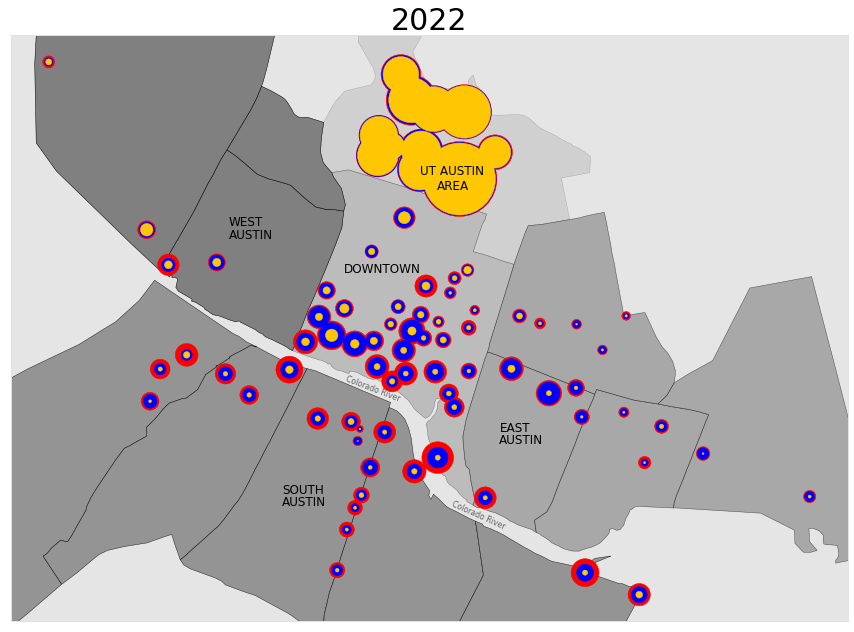

In [120]:
markersize1 = result['Student Rides']/6
markersize2 = markersize1 + result['Local Rides']/6
markersize3 = markersize2 + result['Visitor Rides']/6

fig,ax = plt.subplots(figsize = (15,15))
#base_map_neighborhoods.to_crs(epsg=4326).plot(ax = ax, alpha=0.01, color="gray",edgecolor='black')

# Neighborhoods
base_map_neighborhoods[base_map_neighborhoods['neighname']=='UT'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.20, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST UNIVERSITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.20, color="gray",edgecolor='black')

base_map_neighborhoods[base_map_neighborhoods['neighname']=='DOWNTOWN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.40, color="gray",edgecolor='black')

base_map_neighborhoods[base_map_neighborhoods['neighname']=='EAST CESAR CHAVEZ'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.60, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='HOLLY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.60, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='CENTRAL EAST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.60, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='GOVALLE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.60, color="gray",edgecolor='black')

base_map_neighborhoods[base_map_neighborhoods['neighname']=='BARTON HILLS'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.80, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='ZILKER'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.80, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='BOULDIN CREEK'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.80, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='SOUTH RIVER CITY'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.80, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='RIVERSIDE'].to_crs(epsg=4326).plot(
    ax = ax, alpha=0.80, color="gray",edgecolor='black')

base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD WEST AUSTIN'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='OLD ENFIELD'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="gray",edgecolor='black')
base_map_neighborhoods[base_map_neighborhoods['neighname']=='WEST AUSTIN NG'].to_crs(epsg=4326).plot(
    ax = ax, alpha=1, color="gray",edgecolor='black')

kiosk_geo.plot(ax = ax, color='red',markersize=markersize3, alpha=1)
kiosk_geo.plot(ax = ax, color='blue',markersize=markersize2, alpha=1)
kiosk_geo.plot(ax = ax, color=color_Student,markersize=markersize1, alpha=1)

ax.set_xlim(xlo,xhi)
ax.set_ylim(ylo,yhi)

xspace = (xhi-xlo)/5
ax.set_title(yr_txt,fontsize=30)

plt.text(-97.742,30.2835,"UT AUSTIN",color='black', 
        fontsize = 12)
plt.text(-97.740,30.2820,"AREA",color='black', 
        fontsize = 12)

plt.text(-97.7505,30.27395,"DOWNTOWN",color='black', 
        fontsize = 12)


plt.text(-97.733,30.2585,"EAST",color='black', 
        fontsize = 12)
plt.text(-97.7331,30.2573,"AUSTIN",color='black', 
        fontsize = 12)

plt.text(-97.7635,30.2785,"WEST",color='black', 
        fontsize = 12)
plt.text(-97.7635,30.2773,"AUSTIN",color='black', 
        fontsize = 12)

plt.text(-97.7575,30.2525,"SOUTH",color='black', 
        fontsize = 12)
plt.text(-97.7575,30.2513,"AUSTIN",color='black', 
        fontsize = 12)


plt.text(-97.7505,30.26145,"Colorado River",color='#606467', 
        fontsize = 7.85, rotation = -21)
plt.text(-97.7385,30.2490,"Colorado River",color='#606467', 
        fontsize = 7.85, rotation = -24)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

fig.patch.set_facecolor(color="white")
ax.spines['left'].set_color('#e2e2e2') 
ax.spines['right'].set_color('#e2e2e2') 
ax.spines['bottom'].set_color('#e2e2e2') 
ax.spines['top'].set_color('#e2e2e2') 

In [121]:
trips_2022.loc[trips_2022['Membership Group']=='Student'].groupby('Neighborhood Group Checkout').size()

Neighborhood Group Checkout
DOWNTOWN            8465
EAST AUSTIN         1299
SOUTH AUSTIN        2561
UT AUSTIN AREA    135132
WEST AUSTIN         1934
dtype: int64

In [122]:
trips_2022.loc[trips_2022['Membership Group']=='Local'].groupby('Neighborhood Group Checkout').size().sort_values(ascending = False)

Neighborhood Group Checkout
DOWNTOWN          36136
SOUTH AUSTIN      16125
EAST AUSTIN       11866
UT AUSTIN AREA    11000
WEST AUSTIN        2354
dtype: int64

In [123]:
trips_2022.loc[trips_2022['Membership Group']=='Visitor'].groupby('Neighborhood Group Checkout').size().sort_values(ascending = False)

Neighborhood Group Checkout
DOWNTOWN          28286
SOUTH AUSTIN      24871
EAST AUSTIN        8357
UT AUSTIN AREA     8191
WEST AUSTIN        3027
dtype: int64

In [124]:
trips_2022.loc[trips_2022['Membership Group'].isin(['Local','Visitor'])].groupby(['Neighborhood Group Checkout','Membership Group']).size().unstack().reset_index().sort_values(by = 'Local', ascending = False)

Membership Group Neighborhood Group Checkout  Local  Visitor
0                                   DOWNTOWN  36136    28286
2                               SOUTH AUSTIN  16125    24871
1                                EAST AUSTIN  11866     8357
3                             UT AUSTIN AREA  11000     8191
4                                WEST AUSTIN   2354     3027

In [125]:
np.array([1,2,3,4,5])-0.5

array([0.5, 1.5, 2.5, 3.5, 4.5])

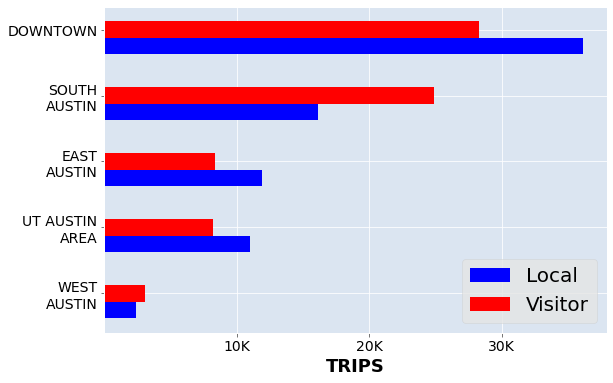

In [126]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (9,6))

ax = plt.axes() 
ax.set_facecolor('#dbe5f1')

# make a plot
ax.barh(np.array([1,2,3,4,5])-0.25,
       trips_2022.loc[trips_2022['Membership Group']=='Local'].groupby('Neighborhood Group Checkout').size().sort_values(ascending = True),
       height=0.25, label='Local', 
                color = 'blue')

ax.barh([1,2,3,4,5],
       trips_2022.loc[trips_2022['Membership Group']=='Visitor'].groupby('Neighborhood Group Checkout').size().sort_values(ascending = True),
       height=0.25, label='Visitor', 
                color = 'Red')

#ax.barh(np.array([1,2,3,4,5])+0.25,
#       [1934, 135132, 1299, 2561, 8465],
#       height=0.25, label='Student', 
#                color = color_Student)

ax.set_xlabel('TRIPS', fontsize=18,color='black',weight = "bold",
         rotation=0)

plt.legend()

y = [1,2,3,4,5];
my_yticks = ['WEST\nAUSTIN','UT AUSTIN\nAREA','EAST\nAUSTIN','SOUTH\nAUSTIN','DOWNTOWN'];
ax.set_yticks(y);
ax.set_yticklabels(my_yticks, rotation = 0,fontsize=14,color='black');

x = [10e3,20e3,30e3];
my_xticks = ['10K','20K','30K'];
ax.set_xticks(x);
ax.set_xticklabels(my_xticks, rotation = 0,fontsize=14,color='black');

# Plotly Figures

In [127]:
trips.head()

Unnamed: 0  Unnamed: 0.1     Trip ID                     Membership Name  \
0           0             0  9900285854        Annual (San Antonio B-cycle)   
1           1             1  9900285855      24-Hour Kiosk (Austin B-cycle)   
2           2             2  9900285856  Annual Membership (Austin B-cycle)   
3           3             3  9900285857      24-Hour Kiosk (Austin B-cycle)   
4           4             4  9900285858      24-Hour Kiosk (Austin B-cycle)   

  Bicycle ID  Bike Type Checkout Date Checkout Time  Checkout Kiosk ID  \
0        207        NaN    10/26/2014      13:12:00             2537.0   
1        969        NaN    10/26/2014      13:12:00             2539.0   
2        214        NaN    10/26/2014      13:12:00             2537.0   
3        745        NaN    10/26/2014      13:12:00             2574.0   
4        164        NaN    10/26/2014      13:12:00             2538.0   

                        Checkout Kiosk  Return Kiosk ID  \
0                             6th/West           2707.0   
1  3rd/Trinity @ The Convention Center           2566.0   
2                             6th/West           2496.0   
3                          Zilker Park           2574.0   
4      Bullock Museum @ Congress & MLK           2539.0   

                                        Return Kiosk  Trip Duration Minutes  \
0                                    Rainey/Cummings                     76   
1  Electric Drive/Sandra Muraida Way @ Pfluger Pe...                     58   
2                                       8th/Congress                      8   
3                                        Zilker Park                     28   
4                3rd/Trinity @ The Convention Center                     15   

   Month_orig  Year_orig    Checkout DateTime      Return DateTime  Year  \
0        10.0     2014.0  2014-10-26 13:12:00  2014-10-26 14:28:00  2014   
1        10.0     2014.0  2014-10-26 13:12:00  2014-10-26 14:10:00  2014   
2        10.0     2014.0  2014-10-26 13:12:00  2014-10-26 13:20:00  2014   
3        10.0     2014.0  2014-10-26 13:12:00  2014-10-26 13:40:00  2014   
4        10.0     2014.0  2014-10-26 13:12:00  2014-10-26 13:27:00  2014   

   Month  Weekday Weekday_name  Checkout_Hour  Checkout_Min Membership Type  \
0     10        7       Sunday             13            12           Other   
1     10        7       Sunday             13            12             Day   
2     10        7       Sunday             13            12          Annual   
3     10        7       Sunday             13            12             Day   
4     10        7       Sunday             13            12             Day   

  Membership Group  Lat Checkout  Lon Checkout  Council District Checkout  \
0            Other      30.27041     -97.75046                        9.0   
1          Visitor      30.26426     -97.74023                        9.0   
2            Local      30.27041     -97.75046                        9.0   
3          Visitor      30.26590     -97.76822                        8.0   
4          Visitor      30.28039     -97.73809                        1.0   

  Neighborhood Checkout Neighborhood Group Checkout  Lat Return  Lon Return  \
0              DOWNTOWN                    DOWNTOWN   30.255906  -97.739949   
1              DOWNTOWN                    DOWNTOWN   30.267170  -97.754840   
2              DOWNTOWN                    DOWNTOWN   30.269800  -97.741860   
3          BARTON HILLS                SOUTH AUSTIN   30.265900  -97.768220   
4              DOWNTOWN                    DOWNTOWN   30.264260  -97.740230   

   Council District Return Neighborhood Return Neighborhood Group Return  \
0                      9.0            DOWNTOWN                  DOWNTOWN   
1                      9.0            DOWNTOWN                  DOWNTOWN   
2                      9.0            DOWNTOWN                  DOWNTOWN   
3                      8.0        BARTON HILLS              SOUTH AUSTIN   
4  

In [128]:
rides_2013=[] 
rides_2014=[]
rides_2015=[] 
rides_2016=[] 
rides_2017=[] 
rides_2018=[] 
rides_2019=[]
rides_2020=[]
rides_2021=[] 
rides_2022=[] 

for kiosk_id in kiosk["Kiosk ID"].unique(): 
    for yr in trips["Year"].unique():
        num_trips = trips.loc[(trips["Year"]==yr)&(trips["Checkout Kiosk ID"]==kiosk_id)].shape[0]
        eval("rides_" + str(yr) + ".append(num_trips)")
        #print(kiosk_id, yr, num_trips)
        num_trips = 0
        
kiosk["Rides_2013"] = rides_2013    
kiosk["Rides_2014"] = rides_2014    
kiosk["Rides_2015"] = rides_2015    
kiosk["Rides_2016"] = rides_2016    
kiosk["Rides_2017"] = rides_2017    
kiosk["Rides_2018"] = rides_2018    
kiosk["Rides_2019"] = rides_2019    
kiosk["Rides_2020"] = rides_2020    
kiosk["Rides_2021"] = rides_2021   
kiosk["Rides_2022"] = rides_2022    

In [129]:
msize_divby = 375

In [130]:
#https://plotly.com/python/scattermapbox/
   
import plotly.graph_objects as go

mapbox_access_token = "pk.eyJ1IjoiZmx5aW5nY2FwZSIsImEiOiJjbDd0YWZnc2YwZ3ZzM29yeDQ4bDl3dHZtIn0.q09s_595pGToclUeM8ojQQ"

fig0 = go.Figure(go.Scattermapbox(
        lat = kiosk_geo['Latitude'],
        lon = kiosk_geo['Longitude'],
        #text = kiosk_geo['text'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size = kiosk_geo['Rides_2020']/msize_divby, color = color_navy,
        ), 
        ))

fig0.update_layout(
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=(kiosk_geo['Latitude'].min()+kiosk_geo['Latitude'].max())/2,
            lon=(kiosk_geo['Longitude'].min()+kiosk_geo['Longitude'].max())/2
        ),
        pitch=0,
        zoom=12.25,
        style = 'streets'
    ),
)

fig0.update_layout(
    autosize=False,
    width=750,
    height=500,
        margin=dict(
        l=0.5,
        r=0.5,
        b=0.5,
        t=0.5,
        pad=0.20
    ),
    paper_bgcolor="White",
)

fig0.update_layout(margin={"r":5,"t":30,"l":5,"b":0},
                  font=dict(
                    family="Droid Sans",
                    size=16,
                    color="Black"
                    ),
                    title={
                    'text': "2020",
                    'y':0.984,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'}
                  )

fig0.show()

In [131]:
import chart_studio
username='flyingcape'
api_key='NI4xzO3e4BldD5kASCBo'
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

import chart_studio.plotly as py

py.plot(fig0, filename="2020_map", auto_open = True)

'https://plotly.com/~flyingcape/51/'

In [132]:
#https://plotly.com/python/scattermapbox/
import plotly.graph_objects as go

mapbox_access_token = "pk.eyJ1IjoiZmx5aW5nY2FwZSIsImEiOiJjbDd0YWZnc2YwZ3ZzM29yeDQ4bDl3dHZtIn0.q09s_595pGToclUeM8ojQQ"

fig1 = go.Figure(go.Scattermapbox(
        lat = kiosk_geo['Latitude'],
        lon = kiosk_geo['Longitude'],
        #text = kiosk_geo['text'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size = kiosk_geo['Rides_2021']/msize_divby, color = color_light,
        ), 
        ))

fig1.update_layout(
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=(kiosk_geo['Latitude'].min()+kiosk_geo['Latitude'].max())/2,
            lon=(kiosk_geo['Longitude'].min()+kiosk_geo['Longitude'].max())/2
        ),
        pitch=0,
        zoom=12.25,
        style = 'streets'
    ),
)

fig1.update_layout(
    autosize=False,
    width=750,
    height=500,
        margin=dict(
        l=0.5,
        r=0.5,
        b=0.5,
        t=0.5,
        pad=0.20
    ),
    paper_bgcolor="White",
)

fig1.update_layout(margin={"r":5,"t":30,"l":5,"b":0},
                  font=dict(
                    family="Droid Sans",
                    size=16,
                    color="Black"
                    ),
                    title={
                    'text': "2021",
                    'y':0.984,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'}
                  )
fig1.show()

In [133]:
import chart_studio
username='flyingcape'
api_key='NI4xzO3e4BldD5kASCBo'
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

import chart_studio.plotly as py

py.plot(fig1, filename="2021_map", auto_open = True)

'https://plotly.com/~flyingcape/17/'

In [134]:
#https://plotly.com/python/scattermapbox/
import plotly.graph_objects as go

mapbox_access_token = "pk.eyJ1IjoiZmx5aW5nY2FwZSIsImEiOiJjbDd0YWZnc2YwZ3ZzM29yeDQ4bDl3dHZtIn0.q09s_595pGToclUeM8ojQQ"

fig2 = go.Figure(go.Scattermapbox(
        lat = kiosk_geo['Latitude'],
        lon = kiosk_geo['Longitude'],
        #text = kiosk_geo['text'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size = kiosk_geo['Rides_2022']/msize_divby, color = color_dark,
        ), 
        ))

fig2.update_layout(
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=(kiosk_geo['Latitude'].min()+kiosk_geo['Latitude'].max())/2,
            lon=(kiosk_geo['Longitude'].min()+kiosk_geo['Longitude'].max())/2
        ),
        pitch=0,
        zoom=12.25,
        style = 'streets'
    ),
)

fig2.update_layout(
    title = "2020",
    autosize=False,
    width=750,
    height=500,
        margin=dict(
        l=0.5,
        r=0.5,
        b=0.5,
        t=0.5,
        pad=0.20
    ),
    paper_bgcolor="White",
)

fig2.update_layout(margin={"r":5,"t":30,"l":5,"b":0},
                  font=dict(
                    family="Droid Sans",
                    size=16,
                    color="Black"
                    ),
                    title={
                    'text': "2022",
                    'y':0.984,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'}
                  )

fig2.show()

In [135]:
import chart_studio
username='flyingcape'
api_key='NI4xzO3e4BldD5kASCBo'
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

import chart_studio.plotly as py

py.plot(fig2, filename="2022_map", auto_open = True)

'https://plotly.com/~flyingcape/54/'

In [136]:
kiosk_temp = kiosk_geo.loc[kiosk_geo['Neighborhood'].isin(['UT AUSTIN','WEST UNIVERSITY'])]

In [137]:
trips_temp = trips_2022.loc[trips_2022['Neighborhood Checkout']=='UT AUSTIN']
trips_temp.head()

Unnamed: 0  Unnamed: 0.1   Trip ID Membership Name Bicycle ID  \
1525923     1525923       1548117  25919356        Local365      19789   
1525930     1525930       1548124  25907451        Local365     15063E   
1525937     1525937       1548131  25936568        Local365      21868   
1525947     1525947       1548141  25922914        Local365      21621   
1525954     1525954       1548148  25906389        Local365      16935   

         Bike Type Checkout Date Checkout Time  Checkout Kiosk ID  \
1525923        NaN    01/17/2022      17:12:41             3799.0   
1525930        NaN    01/14/2022      11:18:04             3798.0   
1525937        NaN    01/23/2022      12:54:46             3798.0   
1525947        NaN    01/18/2022      17:37:13             3798.0   
1525954        NaN    01/13/2022      20:13:13             3798.0   

                         Checkout Kiosk  Return Kiosk ID  \
1525923  23rd/San Jacinto @ DKR Stadium           7188.0   
1525930             21st/Speedway @ PCL           2548.0   
1525937             21st/Speedway @ PCL           2494.0   
1525947             21st/Speedway @ PCL           4938.0   
1525954             21st/Speedway @ PCL           3793.0   

                                   Return Kiosk  Trip Duration Minutes  \
1525923                              22nd/Pearl                      7   
1525930  Guadalupe/West Mall @ University Co-op                      3   
1525937                            2nd/Congress                     22   
1525947                         22.5/Rio Grande                     17   
1525954                         28th/Rio Grande                      9   

         Month_orig  Year_orig    Checkout DateTime      Return DateTime  \
1525923         NaN        NaN  2022-01-17 17:12:41  2022-01-17 17:19:41   
1525930         NaN        NaN  2022-01-14 11:18:04  2022-01-14 11:21:04   
1525937         NaN        NaN  2022-01-23 12:54:46  2022-01-23 13:16:46   
1525947         NaN        NaN  2022-01-18 17:37:13  2022-01-18 17:54:13   
1525954         NaN        NaN  2022-01-13 20:13:13  2022-01-13 20:22:13   

         Year  Month  Weekday Weekday_name  Checkout_Hour  Checkout_Min  \
1525923  2022      1        1       Monday             17            12   
1525930  2022      1        5       Friday             11            18   
1525937  2022      1        7       Sunday             12            54   
1525947  2022      1        2      Tuesday             17            37   
1525954  2022      1        4     Thursday             20            13   

        Membership Type Membership Group  Lat Checkout  Lon Checkout  \
1525923          Annual            Local       30.2856      -97.7335   
1525930          Annual            Local       30.2830      -97.7375   
1525937          Annual            Local       30.2830      -97.7375   
1525947          Annual            Local       30.2830      -97.7375   
1525954          Annual            Local       30.2830      -97.7375   

         Council District Checkout Neighborhood Checkout  \
1525923                        1.0             UT AUSTIN   
1525930                        9.0             UT AUSTIN   
1525937                        9.0             UT AUSTIN   
1525947                        9.0             UT AUSTIN   
1525954                        9.0             UT AUSTIN   

        Neighborhood Group Checkout  Lat Return  Lon Return  \
1525923              UT AUSTIN AREA    30.28530   -97.74670   
1525930              UT AUSTIN AREA    30.28576   -97.74181   
1525937              UT AUSTIN AREA    30.26408   -97.74355   
1525947              UT AUSTIN AREA    30.28620   -97.74516   
1525954              UT AUSTIN AREA    30.29333   -97.74412   

         Council District Return Neighborhood Return  \
1525923                      9.0     WEST UNIVERSITY   
1525930                      9.0     WEST UNIVERSITY   
1525937                      9.0            DOWNTOWN   
1525947                      9.0     W

In [138]:
#https://plotly.com/python/scattermapbox/
    
import plotly.graph_objects as go

mapbox_access_token = "pk.eyJ1IjoiZmx5aW5nY2FwZSIsImEiOiJjbDd0YWZnc2YwZ3ZzM29yeDQ4bDl3dHZtIn0.q09s_595pGToclUeM8ojQQ"

fig0 = go.Figure(go.Scattermapbox(
        lat = kiosk_temp['Latitude'],
        lon = kiosk_temp['Longitude'],
        text = kiosk_temp['Kiosk ID'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size = kiosk_temp['Rides_2022']/275, color = color_dark,
        ), 
        ))

fig0.add_trace(go.Scattergeo(
                    lat = [40.7127, 51.5072],
                    lon = [-74.0059, 0.1275],
                    mode = 'lines',
                    line = dict(width = 2, color = 'blue')))

fig0.update_layout(
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            #lat=(kiosk_temp['Latitude'].min()+kiosk_temp['Latitude'].max())/2,
            #lon=(kiosk_temp['Longitude'].min()+kiosk_temp['Longitude'].max())/2
            lat = 30.286769815923922,
            lon = -97.73900261896549
        ),
        pitch=0,
        zoom=13.75, #12.25,
        style = 'streets'
    ),
)

fig0.update_layout(
    autosize=False,
    width=750,
    height=500,
        margin=dict(
        l=0.5,
        r=0.5,
        b=0.5,
        t=0.5,
        pad=0.20
    ),
    paper_bgcolor="White",
)

fig0.show()

# Trying something

In [139]:
checko_ids_2020 = trips_2020['Checkout Kiosk ID'].unique()
return_ids_2020 = trips_2020['Return Kiosk ID'].unique()
ids_2020 = pd.Series(np.concatenate((checko_ids_2020, return_ids_2020))).dropna()
print("2020 :", ids_2020.nunique())

checko_ids_2021 = trips_2021['Checkout Kiosk ID'].unique()
return_ids_2021 = trips_2021['Return Kiosk ID'].unique()
ids_2021 = pd.Series(np.concatenate((checko_ids_2021, return_ids_2021))).dropna()
print("2021 :", ids_2021.nunique())

checko_ids_2022 = trips_2022['Checkout Kiosk ID'].unique()
return_ids_2022 = trips_2022['Return Kiosk ID'].unique()
ids_2022 = pd.Series(np.concatenate((checko_ids_2022, return_ids_2022))).dropna()
print("2022 :", ids_2022.nunique())

2020 : 76
2021 : 78
2022 : 82


In [140]:
# Digging into the discrepancies 
temp2 = ids_2020.unique()
temp1 = ids_2021.unique()
s = set(temp2)
temp3 = [x for x in temp1 if x not in s]
print("New: ", temp3)
print(kiosk.loc[kiosk['Kiosk ID'].isin(temp3),'Kiosk Name'],'\n')

temp4 = [x for x in s if x not in temp1]
print("Removed: ", temp4)
print(kiosk.loc[kiosk['Kiosk ID'].isin(temp4),'Kiosk Name'],'\n')

New:  [4879.0, 4938.0, 7125.0, 7131.0]
93                     16th/San Antonio
96                      22.5/Rio Grande
101                          23rd/Pearl
102    13th/Trinity @ Waterloo Greenway
Name: Kiosk Name, dtype: object 

Removed:  [3635.0, 2540.0]
51      17th/Guadalupe
61    13th/San Antonio
Name: Kiosk Name, dtype: object 



In [141]:
kiosk_temp1 = kiosk_geo.loc[kiosk_geo['Kiosk ID'].isin(temp3)]
kiosk_temp1['color']=['green']*len(temp3)
kiosk_temp1['size']=[20]*len(temp3)

kiosk_temp2 = kiosk_geo.loc[kiosk_geo['Kiosk ID'].isin(temp4)]
kiosk_temp2['color']=['red']*len(temp4)
kiosk_temp2['size']=[20]*len(temp4)

kiosk_temp3 = kiosk_geo.loc[(kiosk_geo['Kiosk ID'].isin(temp1))&(~kiosk_geo['Kiosk ID'].isin(temp3))]
kiosk_temp3['color']=['black']*kiosk_temp3.shape[0]
kiosk_temp3['size']=[10]*kiosk_temp3.shape[0]


In [142]:
frames = [kiosk_temp1, kiosk_temp2, kiosk_temp3]
kiosk_temp = pd.concat(frames)